In [3]:
df=pd.read_csv('PD_complete_data_with_omim.csv')
df['id1']=df['id1'].astype('str')
df['disease']='Parkinson'
df['Symbol']=df['gene_symbol']
df['label']=df['OMIM']
df.to_csv('PD_complete_data_with_omim.tsv',sep='\t')



In [150]:
df2=pd.read_csv('complete_data_bibliometrics_with_all_diseases_biobert_svm_prediction_updated.tsv',sep='\t')

In [4]:
!pwd

/data/users/nency/truth_discovery/gene_discovery/gene_discovery/merged_correct_omim_filtered


In [151]:
df2.columns

Index(['index', 'id1', 'id2', 'is_in_same_sent', 'min_sents_window',
       'sentence', 'in_neighbors', 'label', 'hindex', 'year', 'citations',
       'journal', 'disease', 'Unnamed: 0', 'Symbol', 'Prediction', 'year_diff',
       'pred_label', 'pred_proba'],
      dtype='object')

In [1]:
from calculate_pagerank_rrf import load_unified_data, build_graph
df3=load_unified_data(min_papers=2, file_path='PD_complete_data_with_omim.tsv')

  📖 Loading Unified Text Data: PD_complete_data_with_omim.tsv
Index(['Unnamed: 0', 'index', 'id1', 'id2', 'sentence', 'Prediction', 'PMID',
       'gene_id', 'gene_symbol', 'journal', 'hindex', 'year', 'citations',
       'sentence_processed', 'pred_label', 'pred_proba', 'label', 'OMIM',
       'disease', 'Symbol'],
      dtype='object')
        Unnamed: 0     index     id1      id2  \
0                0  17331494    6469  D010300   
1                1  28168622    6622  D010300   
2                2  32707456  120892  D010300   
3                3  32707456    2629  D010300   
4                4  32707456    5071  D010300   
...            ...       ...     ...      ...   
105369      105369  38858457   10981  D010300   
105370      105370  38858457  120892  D010300   
105371      105371  26497564    6571  D010300   
105372      105372  11761482    6311  D010300   
105373      105373  16051700   54822  D010300   

                                                 sentence  Prediction  

In [2]:
df3

,Unnamed: 0,index,id1,id2,sentence,Prediction,PMID,gene_id,gene_symbol,journal,...,label,OMIM,disease,Symbol,year_diff_norm,citations_scaled,hindex_scaled,rs,vq*,vq_star_mean
0,0,17331494,6469,D010300,Midbrain dopamine neuron differentiation : fac...,0,17331494,6469,SHH,Developmental biology,...,0,0,Parkinson,SHH,0.156522,0.006144,0.184879,0.234659,0.806792,0.806792
1,1,28168622,6622,D010300,@GeneSrc$ and iron : two keys unlocking @Disea...,0,28168622,6622,SNCA,"Journal of neural transmission (Vienna, Austri...",...,1,1,Parkinson,SNCA,0.069565,0.002032,0.090508,0.109503,0.975246,0.975246
2,2,32707456,120892,D010300,Novel and reported variants in @DiseaseTgt$ ge...,0,32707456,120892,LRRK2,Parkinsonism & related disorders,...,1,1,Parkinson,LRRK2,0.043478,0.001323,0.082781,0.085335,0.988363,0.988363
3,3,32707456,2629,D010300,Novel and reported variants in @DiseaseTgt$ ge...,0,32707456,2629,GBA1,Parkinsonism & related disorders,...,1,1,Parkinson,GBA1,0.043478,0.001323,0.082781,0.085335,0.986495,0.986495
4,4,32707456,5071,D010300,Novel and reported variants in @DiseaseTgt$ ge...,0,32707456,5071,PRKN,Parkinsonism & related disorders,...,1,1,Parkinson,PRKN,0.043478,0.001323,0.082781,0.085335,0.986926,0.986926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105369,105369,38858457,10981,D010300,Systematic rare variant analyses identify @ Ge...,1,38858457,10981,RAB32,Nature genetics,...,1,1,Parkinson,RAB32,0.008696,0.002410,0.431015,0.284502,0.995989,0.995989
105370,105370,38858457,120892,D010300,Systematic rare variant analyses identify RAB3...,1,38858457,120892,LRRK2,Nature genetics,...,1,1,Parkinson,LRRK2,0.008696,0.002410,0.431015,0.284502,0.988363,0.988363
105371,105371,26497564,6571,D010300,Brain dopamine-serotonin vesicular transport d...,0,26497564,6571,SLC18A2,Journal of inherited metabolic disease,...,1,1,Parkinson,SLC18A2,0.078261,0.002079,0.082230,0.110525,0.874444,0.874444
105372,105372,11761482,6311,D010300,Spinocerebellar ataxia type 2 presenting famil...,0,11761482,6311,ATXN2,Annals of neurology,...,1,1,Parkinson,ATXN2,0.208696,0.005151,0.239514,0.307676,0.960510,0.960510


In [36]:
df3=df3.drop_duplicates(subset=['id1','id2','vq*'])

In [12]:
df3=pd.read_csv('/data/users/nency/truth_discovery/gene_discovery/gene_discovery/merged_correct_omim_filtered/PD_complete_results/result_data_v17.csv')

In [45]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve, classification_report, matthews_corrcoef

# 1. Define your columns
score_col = 'vq*' 
label_col = 'label'

# 2. Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(df3[label_col], df3[score_col])

# 3. Calculate F1 and MCC for each threshold
# Note: thresholds from precision_recall_curve has len(precision)-1
# We iterate through each threshold to find the one that maximizes our metric
mcc_scores = []
for t in thresholds:
    y_pred = (df3[score_col] >= t).astype(int)
    mcc_scores.append(matthews_corrcoef(df3[label_col], y_pred))

with np.errstate(divide='ignore', invalid='ignore'):
    f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# 4. Find the index of the maximum MCC (or F1)
best_mcc_idx = np.nanargmax(mcc_scores)
best_threshold = thresholds[best_mcc_idx]
max_mcc = mcc_scores[best_mcc_idx]

print(f"Optimal Threshold (via MCC): {best_threshold:.4f}")
print(f"Max MCC Score: {max_mcc:.4f}")

# 5. Generate Classification Report and Final MCC
df3['predicted_label'] = (df3[score_col] >= best_threshold).astype(int)
final_mcc = matthews_corrcoef(df3[label_col], df3['predicted_label'])

print("\nClassification Report at Optimal Threshold:")
print(classification_report(df3[label_col], df3['predicted_label']))
print(f"Matthews Correlation Coefficient: {final_mcc:.4f}")

Optimal Threshold (via MCC): 0.9752
Max MCC Score: 0.7650

Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     77835
           1       0.81      0.82      0.82     21947

    accuracy                           0.92     99782
   macro avg       0.88      0.88      0.88     99782
weighted avg       0.92      0.92      0.92     99782

Matthews Correlation Coefficient: 0.7650


In [42]:
# Set the threshold to 0.7
threshold_07 = 0.97

# Create predictions
df3['pred_07'] = (df3[score_col] >= threshold_07).astype(int)

# Filter for OMIM genes (label == 1) that were correctly predicted
caught_omim = df3[(df3[label_col] == 1) & (df3['pred_07'] == 1)]

print(f"OMIM genes caught at 0.7: {len(caught_omim)} out of 30")
print(f"Recall at 0.7: {len(caught_omim) / 30:.2f}")

OMIM genes caught at 0.7: 19 out of 30
Recall at 0.7: 0.63


Loading Data...
/data/users/nency/truth_discovery/gene_discovery/gene_discovery/merged_correct_omim_filtered/PD_complete_data_with_omim.tsv
  📖 Loading Unified Text Data: /data/users/nency/truth_discovery/gene_discovery/gene_discovery/merged_correct_omim_filtered/PD_complete_data_with_omim.tsv
Index(['Unnamed: 0', 'index', 'id1', 'id2', 'sentence', 'Prediction', 'PMID',
       'gene_id', 'gene_symbol', 'journal', 'hindex', 'year', 'citations',
       'sentence_processed', 'pred_label', 'pred_proba', 'label', 'OMIM',
       'disease', 'Symbol'],
      dtype='object')
Causal
0.85
Not causal
Not causal
Causal
0.85
Causal
0.85
Not causal
Causal
0.85
Causal
0.85
Causal
0.75
Not causal
Causal
0.85
Causal
0.91
Causal
0.85
Causal
0.85
Causal
0.85
Causal
0.75
Not causal
Causal
0.85
Causal
0.78
Causal
0.92
Causal
0.7
Causal
0.85
Causal
0.92
Not causal
Causal
0.85
Causal
0.85
Not causal
Not causal
Not causal
Causal
0.85
Causal
0.85
Causal
0.85
Causal
0.85
Not causal
Causal
0.92
Not causal
Causal


/data/users/nency/llm/.venv/lib/python3.12/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)



🔬 REGULATORY NETWORK EFFECT ANALYSIS

1️⃣  GENE DISTRIBUTION ACROSS LAYERS
   Bibliometric-only genes: 10745
   Regulatory-only genes: 0
   Genes in BOTH layers: 234
   Total unique genes: 10979

2️⃣  TOP GENES BY LAYER TYPE

   📚 Top Bibliometric-only genes:

   🔗 Top genes in BOTH layers:

3️⃣  SCORE STATISTICS BY LAYER

4️⃣  RANKING IMPACT

5️⃣  TRUE POSITIVE ANALYSIS

--- TOP 10 GENES ---

--- SCORE BY HOP DISTANCE ---

   📊 Saved PR & Recall@K plots for Parkinson

FINAL PERFORMANCE REPORT
  disease   PR-AUC
Parkinson 0.091047
------------------------------------------------------------
AVERAGE PR-AUC: 0.0910

   💾 Saved PR curve to: /data/users/nency/truth_discovery/gene_discovery/gene_discovery/merged_correct_omim_filtered/PD_complete_results/precision_recall_curve.png

Generating Recall @ K Curve...
   💾 Saved Recall @ K curve to: /data/users/nency/truth_discovery/gene_discovery/gene_discovery/merged_correct_omim_filtered/PD_complete_results/recall_at_k_curve.png

📊 REGULATORY 

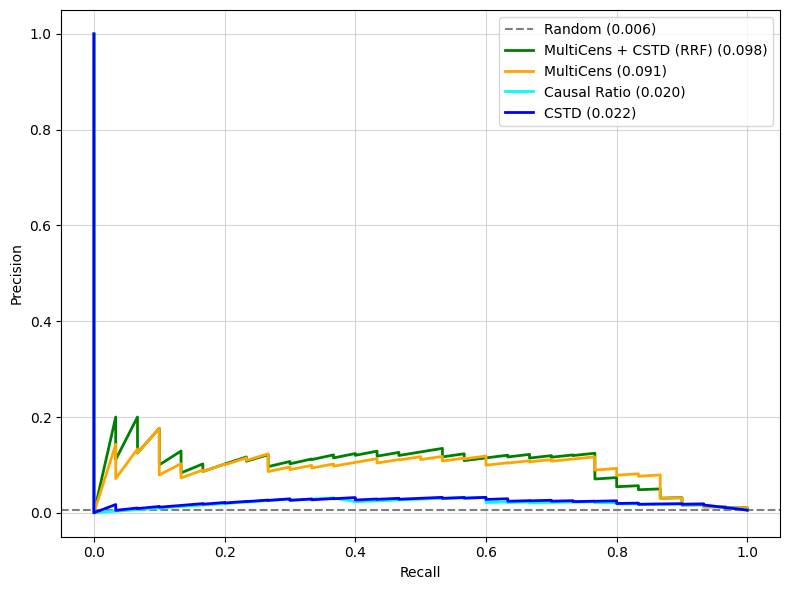

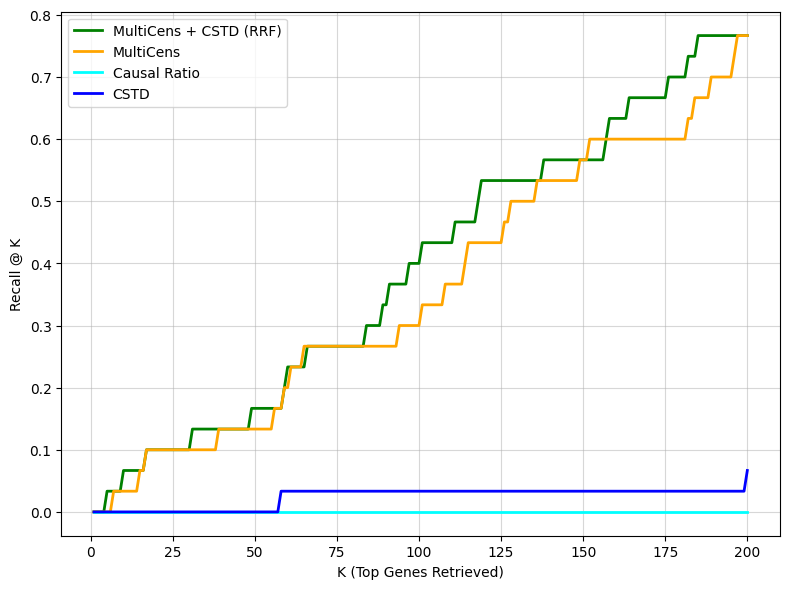

In [175]:
#!/usr/bin/env python3
"""
Matrix-Metapath-Rank v17: Disease-Gene Connectivity
==========================================================
Note: build_graph() already creates Disease → Gene edges.
No bidirectional conversion needed.
"""

import pandas as pd
import numpy as np
import networkx as nx
import scipy.sparse as sp
from scipy.sparse.linalg import norm
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, classification_report
from collections import deque
import os
import sys

# ============================================================================
# CONFIGURATION
# ============================================================================
BASE_PATH = '/data/users/nency/truth_discovery/gene_discovery/gene_discovery/merged_correct_omim_filtered'
sys.path.insert(0, BASE_PATH)

try:
    from calculate_pagerank_rrf import load_unified_data, build_graph
except ImportError:
    print("Warning: Could not import load_unified_data. Ensure paths are correct.")

INPUT_FILE = os.path.join(BASE_PATH, 'PD_complete_data_with_omim.tsv')
CRISPR_FILE = os.path.join(BASE_PATH, 'crispr_gene_regulatory_network.tsv')
OUTPUT_DIR = os.path.join(BASE_PATH, 'PD_complete_results')
DISEASE_PLOTS_DIR = os.path.join(OUTPUT_DIR, 'disease_plots')

# LLM Files
OPENAI_FILE = os.path.join(BASE_PATH, 'llm_results/All_disease_llm_results_cred.csv')
MEDLLAMA_FILE = '/data/users/nency/llm_results/all_disease_MMed-Llama-3-8B_llm_results_2026-01-25.csv'
OPENAI_NO_CRED_FILE = os.path.join(BASE_PATH, 'llm_results/All_disease_no_cred_llm_results_pure.csv')
MEDLLAMA_NO_CRED_FILE = '/data/users/nency/llm_results/all_disease_MMed-Llama-3-8B_llm_results_2025-12-31.csv'

# Hyperparameters
ALPHA = 0.5           # Damping factor
OMEGA = 0.5             
K_RRF = 60             

# ============================================================================
# UTILS & MATRIX BUILDERS
# ============================================================================

def row_normalize(M):
    """Row-normalize sparse matrix using LIL format for efficiency."""
    M = M.tolil()
    row_sums = np.array(M.sum(axis=1)).flatten()
    sinks = np.where(row_sums == 0)[0]
    for i in sinks:
        M[i, i] = 1.0
        row_sums[i] = 1.0
    M = M.tocsr()
    r_inv = sp.diags(1.0 / row_sums)
    return r_inv.dot(M)

def scale_scores(df, columns):
    """Scale scores to 0-1."""
    for col in columns:
        if col in df.columns:
            min_val = df[col].min()
            max_val = df[col].max()
            if max_val > min_val:
                df[col] = (df[col] - min_val) / (max_val - min_val)
            else:
                df[col] = 0.5
    return df


def plot_disease_curves(disease_df, disease_name, output_dir, methods):
    """
    Generate and save PR curve and Recall@K curve for a single disease.
    
    Args:
        disease_df: DataFrame with results for one disease
        disease_name: Name of the disease
        output_dir: Directory to save plots
        methods: List of (col_name, display_label, color) tuples
    """
    # Filter valid samples
    mask = disease_df['label'].notna() & (disease_df['paper_count'] > 1)
    if mask.sum() < 5:
        return None
    
    y_true = disease_df.loc[mask, 'label'].astype(int).values
    if y_true.sum() == 0:
        return None
    
    # Sanitize disease name for filename
    safe_name = disease_name.replace(' ', '_').replace('/', '_').replace('\\', '_')
    
    # =================
    # PR CURVE
    # =================
    fig, ax = plt.subplots(figsize=(10, 8))
    pos_rate = y_true.mean()
    ax.axhline(y=pos_rate, ls='--', color='gray', alpha=0.5, label=f'Random ({pos_rate:.3f})')
    
    auc_scores = {}
    for col, label, color in methods:
        if col not in disease_df.columns:
            continue
        scores = disease_df.loc[mask, col].fillna(0).values
        if np.all(scores == 0):
            continue
        precision, recall, _ = precision_recall_curve(y_true, scores)
        auc_val = auc(recall, precision)
        auc_scores[label] = auc_val
        ax.plot(recall, precision, lw=2, color=color, label=f'{label} ({auc_val:.3f})')
    
    ax.set_xlabel('Recall', fontsize=12)
    ax.set_ylabel('Precision', fontsize=12)
    ax.set_title(f'Precision-Recall Curve: {disease_name}', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    
    plt.tight_layout()
    pr_file = os.path.join(output_dir, f'{safe_name}_pr_curve.png')
    plt.savefig(pr_file, dpi=150, bbox_inches='tight')
    plt.close()
    
    # =================
    # RECALL @ K CURVE
    # =================
    fig, ax = plt.subplots(figsize=(10, 8))
    total_positives = y_true.sum()
    max_k = min(len(y_true), 200)
    x_k = np.arange(1, max_k + 1)
    
    for col, label, color in methods:
        if col not in disease_df.columns:
            continue
        scores = disease_df.loc[mask, col].fillna(0).values
        if np.all(scores == 0):
            continue
        sorted_indices = np.argsort(scores)[::-1]
        sorted_labels = y_true[sorted_indices]
        cum_tp = np.cumsum(sorted_labels)
        recall_at_k = cum_tp[:max_k] / total_positives
        ax.plot(x_k, recall_at_k, lw=2, color=color, label=f'{label}')
    
    ax.set_xlabel('K (Top Genes Retrieved)', fontsize=12)
    ax.set_ylabel('Recall @ K', fontsize=12)
    ax.set_title(f'Recall @ K: {disease_name}', fontsize=14, fontweight='bold')
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xlim([1, max_k])
    ax.set_ylim([0, 1])
    
    plt.tight_layout()
    recall_file = os.path.join(output_dir, f'{safe_name}_recall_at_k.png')
    plt.savefig(recall_file, dpi=150, bbox_inches='tight')
    plt.close()
    
    return auc_scores


def build_supra_adjacency_fixed(G_biblio, crispr_edges, all_genes, seeds, target_id, omega=0.5):
    """
    Builds the Supra-Adjacency Matrix with directed edges.
    
    Note: build_graph() already creates Disease → Gene edges, so we add them
    as directed edges (no bidirectional conversion needed).
    """
    n = len(all_genes)
    gene_to_idx = {str(gene): i for i, gene in enumerate(all_genes)}
    
    print(f"\n   [BUILD] Creating Supra-Adjacency Matrix...")
    print(f"   [BUILD] Total nodes: {n}")
    print(f"   [BUILD] Target Disease: {target_id}")
    
    dis_idx = gene_to_idx.get(str(target_id))
    if dis_idx is not None:
        print(f"   [BUILD] Disease index: {dis_idx}")
    else:
        print(f"   [BUILD] ⚠️ Disease '{target_id}' not in gene_to_idx!")
    
    # --- LAYER 1: BIBLIOMETRIC (DIRECTED) ---
    A_bib = sp.lil_matrix((n, n))
    
    edge_count = 0
    disease_edge_count = 0
    
    # Iterate through ALL edges in NetworkX graph
    for u, v, data in G_biblio.edges(data=True):
        u_str = str(u)
        v_str = str(v)
        
        if u_str in gene_to_idx and v_str in gene_to_idx:
            weight = data.get('weight', 1.0)
            i, j = gene_to_idx[u_str], gene_to_idx[v_str]
            
            # Add edge as directed (build_graph already creates Disease → Gene)
            A_bib[i, j] = weight
            
            edge_count += 1
            
            # Track Disease edges
            if u_str == str(target_id) or v_str == str(target_id):
                disease_edge_count += 1
    
    print(f"   [BUILD] Total edges added: {edge_count}")
    print(f"   [BUILD] Disease-Gene edges: {disease_edge_count}")
    
    # Verify Disease connectivity
    if dis_idx is not None:
        dis_out = A_bib[dis_idx, :].nnz
        dis_in = A_bib[:, dis_idx].nnz
        print(f"   [BUILD] Disease outgoing edges: {dis_out}")
        print(f"   [BUILD] Disease incoming edges: {dis_in}")
    
    A_bib = A_bib.tocsr()
    
    # --- LAYER 2: CRISPR (DIRECTED) ---
    A_reg = sp.lil_matrix((n, n))
    crispr_added = 0
    for s, t, w in crispr_edges:
        s_str, t_str = str(s), str(t)
        if s_str in gene_to_idx and t_str in gene_to_idx:
            i, j = gene_to_idx[s_str], gene_to_idx[t_str]
            A_reg[i, j] = float(w)  # Directed causal edge
            crispr_added += 1
    A_reg = A_reg.tocsr()
    print(f"   [BUILD] CRISPR edges added: {crispr_added}")
    
    # Normalize Layers
    A_bib_norm = row_normalize(A_bib)
    A_reg_norm = row_normalize(A_reg)
    
    # --- RESTRICTED COUPLING (using regulatory network weights) ---
    I_coupling = sp.lil_matrix((n, n))
    seed_indices = [gene_to_idx[str(s)] for s in seeds if str(s) in gene_to_idx]
    
    # Calculate coupling weights from regulatory network
    # Use sum of outgoing edges for each seed node
    if len(seed_indices) > 0:
        reg_weights = []
        for idx in seed_indices:
            # Sum of outgoing regulatory edges for this seed node
            weight_sum = A_reg[idx, :].sum()
            reg_weights.append(float(weight_sum))
        
        # Normalize weights to [0, omega] range if needed, or use directly
        if max(reg_weights) > 0:
            max_weight = max(reg_weights)
            # Scale to omega range, or use raw weights if they're reasonable
            # Option 1: Normalize to omega range
            # reg_weights = [w / max_weight * omega for w in reg_weights]
            # Option 2: Use raw weights (clamped to reasonable range)
            reg_weights = [min(w, omega) if w > omega else w for w in reg_weights]
        else:
            # Fallback to omega if no regulatory edges
            reg_weights = [omega] * len(seed_indices)
        
        for idx, weight in zip(seed_indices, reg_weights):
            I_coupling[idx, idx] = weight
        
    I_coupling = I_coupling.tocsr()
    
    # Build Block Matrix
    A_bib_scaled = A_bib_norm * (1 - omega)
    A_reg_scaled = A_reg_norm * (1 - omega)
    
    M_supra = sp.bmat([
        [A_bib_scaled, I_coupling],
        [I_coupling,   A_reg_scaled]
    ], format='csr')
    
    M_supra = row_normalize(M_supra)
    # print(M_supra,'--------')
    
    # Final verification
    if dis_idx is not None:
        final_out = M_supra[dis_idx, :n].nnz
        # print(f"   [BUILD] ✅ FINAL: Disease has {final_out} outgoing edges in M_supra Layer 1")
    
    return M_supra, gene_to_idx, n


# ============================================================================
# CORE MULTICENS FUNCTIONS
# ============================================================================

def right_new_local_centrality_st(A_tilde_full, num_layers, target_tissue, target_gene_weights_local, p=0.9):
    N = A_tilde_full.shape[0]
    n = int(N / num_layers)
    start_row = target_tissue * n
    end_row = (target_tissue + 1) * n
    
    sub_A = A_tilde_full[start_row:end_row, start_row:end_row]
    
    v_sub = np.zeros(n)
    for idx, weight in target_gene_weights_local.items():
        if idx < n: v_sub[idx] = float(weight)
            
    if v_sub.sum() > 0: v_sub = v_sub / v_sub.sum()
        
    l_sub = v_sub.copy()
    sub_A_t = sub_A.T 
    
    for _ in range(100):
        l_new = p * sub_A_t.dot(l_sub) + (1 - p) * v_sub
        if np.linalg.norm(l_new - l_sub, 1) < 1e-6:
            l_sub = l_new
            break
        l_sub = l_new
    l_full = np.zeros(N)
    l_full[start_row:end_row] = l_sub
    return l_full

def right_target_global_centrality_t(A_tilde_full, num_layers, target_tissue, target_gene_weights_local, p=0.9):
    N = A_tilde_full.shape[0]
    print(N,'-------------hncvmbvcjahkmcvjhgajckbmajhchaskj')
    n = int(N / num_layers)
    
    l = right_new_local_centrality_st(A_tilde_full, num_layers, target_tissue, target_gene_weights_local, p)
    
    A = A_tilde_full.copy()
    A[:n, n:] = 0
    A[n:, :n] = 0
    C = A_tilde_full - A 
    
    v = np.zeros(N)
    start_row = target_tissue * n
    for idx, weight in target_gene_weights_local.items():
        v[start_row + idx] = float(weight)
        
    if v.sum() > 0: v = v / v.sum()
        
    g = v.copy()
    M_t = A_tilde_full.T
    C_t = C.T
    injection = p * C_t.dot(l)
    
    for _ in range(100):
        g_new = p * M_t.dot(g) + injection + (1 - p) * v
        if np.linalg.norm(g_new - g, 1) < 1e-6:
            g = g_new
            break
        g = g_new
    
    new_g = g.copy()
    if target_tissue == 1:
        if new_g[:n].max() > 0: new_g[:n] = g[:n] / g[:n].max()
    elif target_tissue == 0:
        if new_g[n:].max() > 0: new_g[n:] = g[n:] / g[n:].max()
            
    return l, new_g


# ============================================================================
# PATH CONNECTIVITY DIAGNOSTICS
# ============================================================================

def diagnose_path_connectivity(M_supra, g_map, n_genes, target_id, max_hops=4, num_examples=5):
    """
    Diagnose: Can the random walker reach distant genes from Disease?
    """
    print("\n" + "="*60)
    print("🔍 PATH CONNECTIVITY DIAGNOSTIC")
    print("="*60)
    
    idx_to_gene = {v: k for k, v in g_map.items()}
    
    target_str = str(target_id)
    if target_str not in g_map:
        print(f"   ❌ Disease '{target_id}' not in g_map!")
        return None, None
    
    dis_idx = g_map[target_str]
    
    A_biblio = M_supra[:n_genes, :n_genes]
    A_crispr = M_supra[n_genes:, n_genes:]
    
    # --- 1. DIRECT NEIGHBORS ---
    dis_row = A_biblio[dis_idx, :].toarray().flatten()
    direct_neighbors = np.where(dis_row > 0)[0]
    direct_neighbors = [i for i in direct_neighbors if i != dis_idx]
    
    print(f"\n1️⃣  DISEASE DIRECT NEIGHBORS (1-hop)")
    print(f"   Disease '{target_id}' has {len(direct_neighbors)} outgoing edges")
    
    if len(direct_neighbors) == 0:
        print("   ❌ STILL NO OUTGOING EDGES!")
        print("   Random walker CANNOT leave Disease node.")
        return None, None
    else:
        print("   ✅ Disease can reach genes!")
    
    # Show top neighbors by weight
    neighbor_weights = [(i, dis_row[i]) for i in direct_neighbors]
    neighbor_weights.sort(key=lambda x: x[1], reverse=True)
    
    print(f"\n   Top neighbors:")
    for idx, weight in neighbor_weights[:5]:
        gene = idx_to_gene.get(idx, "Unknown")
        print(f"   → {gene} (weight: {weight:.4f})")
    
    # --- 2. BFS FOR MULTI-HOP ---
    visited = {dis_idx: 0}
    parent = {dis_idx: None}
    queue = deque([(dis_idx, 0)])
    hop_counts = {0: 1}
    
    while queue:
        current, hops = queue.popleft()
        if hops >= max_hops:
            continue
        
        neighbors_biblio = set(A_biblio[current, :].nonzero()[1])
        neighbors_crispr = set(A_crispr[current, :].nonzero()[1])
        all_neighbors = neighbors_biblio | neighbors_crispr
        
        for neighbor in all_neighbors:
            if neighbor not in visited:
                visited[neighbor] = hops + 1
                parent[neighbor] = current
                queue.append((neighbor, hops + 1))
                hop_counts[hops + 1] = hop_counts.get(hops + 1, 0) + 1
    
    print(f"\n2️⃣  MULTI-HOP REACHABILITY")
    for hop in sorted(hop_counts.keys()):
        if hop == 0:
            print(f"   Hop {hop}: Disease (start)")
        else:
            print(f"   Hop {hop}: {hop_counts[hop]} genes")
    
    total_reachable = len(visited) - 1
    total_genes = n_genes - 1
    coverage = (total_reachable / total_genes * 100) if total_genes > 0 else 0
    
    # print(f"\n   📊 COVERAGE: {total_reachable}/{total_genes} ({coverage:.1f}%)")
    
    # if coverage >= 90:
    #     print("   ✅ EXCELLENT! Almost all genes reachable.")
    # elif coverage >= 50:
    #     print("   ℹ️  GOOD. Most genes reachable.")
    # else:
    #     print("   ⚠️  LOW. Many genes unreachable from Disease.")
    
    # --- 3. EXAMPLE PATHS ---
    # print(f"\n3️⃣  EXAMPLE PATHS (Disease → A → B → ...)")
    
    # Find multi-hop paths
    multi_hop_genes = [g for g, h in visited.items() if h >= 2 and g != dis_idx]
    
    shown = 0
    for gene_idx in multi_hop_genes[:num_examples]:
        path = []
        current = gene_idx
        while current is not None:
            path.append(current)
            current = parent.get(current)
        path = path[::-1]
        
        path_str = " → ".join([idx_to_gene.get(p, str(p)) for p in path])
        print(f"   [{visited[gene_idx]}-hop] {path_str}")
        shown += 1
    
    if shown == 0:
        # Show 1-hop paths instead
        one_hop = [g for g, h in visited.items() if h == 1][:3]
        for gene_idx in one_hop:
            gene = idx_to_gene.get(gene_idx, str(gene_idx))
            print(f"   [1-hop] {target_id} → {gene}")
    
    # --- 4. GENE-GENE CONNECTIVITY ---
    print(f"\n4️⃣  GENE-GENE EDGES (for multi-hop paths)")
    
    gene_gene_biblio = 0
    gene_gene_crispr = 0
    
    for i in range(n_genes):
        if i == dis_idx:
            continue
        for j in A_biblio[i, :].nonzero()[1]:
            if j != dis_idx and j > i:
                gene_gene_biblio += 1
        for j in A_crispr[i, :].nonzero()[1]:
            if j != dis_idx and j > i:
                gene_gene_crispr += 1
    
    print(f"   Bibliometric Gene-Gene edges: {gene_gene_biblio}")
    print(f"   CRISPR Gene-Gene edges: {gene_gene_crispr}")
    
    if gene_gene_biblio + gene_gene_crispr == 0:
        print("   ⚠️  NO Gene-Gene edges! Only Disease↔Gene connections exist.")
        print("   This is a STAR topology - paths limited to 1 hop.")
    else:
        print("   ✅ Gene-Gene edges exist for multi-hop propagation.")
    
    print("="*60)
    
    return visited, parent


# ============================================================================
# FUSION & HELPERS
# ============================================================================

def calculate_rrf(matrix_scores, vq_map, k=60):
    genes = list(matrix_scores.keys())
    if not genes: return {}
    results = []
    for gene in genes:
        results.append({'gene': gene, 'mat': matrix_scores.get(gene, 0), 'vq': vq_map.get(gene, 0)})
    df = pd.DataFrame(results)
    
    df['r_mat'] = df['mat'].rank(ascending=False)
    df['r_vq'] = df['vq'].rank(ascending=False)
    
    df['score'] = (1 / (k + df['r_mat'])) + (1 / (k + df['r_vq']))
    return dict(zip(df['gene'], df['score']))


def load_llm_scores(filepath, df_full):
    if not os.path.exists(filepath): return {}
    llm_df = pd.read_csv(filepath)
    if 'id1' in llm_df.columns: llm_df['id1'] = llm_df['id1'].astype(str).str.replace(r'\.0$', '', regex=True)
    if 'id2' in llm_df.columns: llm_df['id2'] = llm_df['id2'].astype(str).str.replace(r'\.0$', '', regex=True)
    
    dis_map = {}
    if 'disease' in df_full.columns:
        temp = df_full[['id2', 'disease']].drop_duplicates()
        dis_map = dict(zip(temp['id2'].astype(str).str.replace(r'\.0$', '', regex=True), temp['disease']))
    
    score_map = {}
    for _, row in llm_df.iterrows():
        d_key = str(row['id2'])
        d_name = dis_map.get(d_key, d_key)
        val = float(row.get('score', row.get('probability', row.get('llm_score', 0))))
        relationship_status = row.get('relationship', row.get('llm_relationship', row.get('label', row.get('prediction', ''))))
        print(relationship_status)
        if isinstance(relationship_status, str):
            status_lower = relationship_status.lower()
            if ('negative' in status_lower or 'not causal' in status_lower or 
                'non-causal' in status_lower or 'no association' in status_lower):
                if val > 0.5: val = 1.0 - val
            elif('causal' in status_lower):
                print(val)
                if val < 0.5: val = 1.0 - val
        if pd.notna(val): score_map[(d_name, str(row['id1']))] = val
            
    return score_map

def analyze_seed_regulatory_connections(seeds, crispr_edges, label_map):
    """
    Analyze how many seed genes have connections in the regulatory network.
    """
    print("\n" + "="*60)
    print("🌱 SEED GENES REGULATORY CONNECTION ANALYSIS")
    print("="*60)
    
    # Build regulatory network adjacency
    reg_genes = set()
    reg_edges = {}  # gene -> list of (target, weight)
    reg_in_edges = {}  # gene -> list of (source, weight)
    
    for s, t, w in crispr_edges:
        s_str, t_str = str(s), str(t)
        reg_genes.add(s_str)
        reg_genes.add(t_str)
        
        if s_str not in reg_edges:
            reg_edges[s_str] = []
        reg_edges[s_str].append((t_str, w))
        
        if t_str not in reg_in_edges:
            reg_in_edges[t_str] = []
        reg_in_edges[t_str].append((s_str, w))
    
    seeds_set = set([str(s) for s in seeds])
    
    # Analyze seed connectivity
    seeds_in_reg = seeds_set & reg_genes
    seeds_not_in_reg = seeds_set - reg_genes
    
    print(f"\n1️⃣  SEED GENES OVERVIEW")
    print(f"   Total seed genes: {len(seeds_set)}")
    print(f"   Seeds IN regulatory network: {len(seeds_in_reg)} ({len(seeds_in_reg)/len(seeds_set)*100:.1f}%)")
    print(f"   Seeds NOT in regulatory network: {len(seeds_not_in_reg)} ({len(seeds_not_in_reg)/len(seeds_set)*100:.1f}%)")
    
    # Detailed connectivity for seeds in regulatory network
    print(f"\n2️⃣  SEED CONNECTIVITY DETAILS")
    seed_connections = []
    for seed in seeds_in_reg:
        out_edges = reg_edges.get(seed, [])
        in_edges = reg_in_edges.get(seed, [])
        
        # Count connections to other seeds
        out_to_seeds = [t for t, w in out_edges if t in seeds_set]
        in_from_seeds = [s for s, w in in_edges if s in seeds_set]
        
        # Count connections to non-seeds
        out_to_non_seeds = [t for t, w in out_edges if t not in seeds_set]
        in_from_non_seeds = [s for s, w in in_edges if s not in seeds_set]
        
        label = label_map.get(seed, 0)
        seed_connections.append({
            'seed': seed,
            'label': label,
            'out_total': len(out_edges),
            'in_total': len(in_edges),
            'out_to_seeds': len(out_to_seeds),
            'in_from_seeds': len(in_from_seeds),
            'out_to_non_seeds': len(out_to_non_seeds),
            'in_from_non_seeds': len(in_from_non_seeds),
            'total_connections': len(out_edges) + len(in_edges)
        })
    
    # Sort by total connections
    seed_connections.sort(key=lambda x: x['total_connections'], reverse=True)
    
    # print(f"\n   Top 10 most connected seed genes:")
    # print(f"   {'Gene':<12} | {'Label':^5} | {'Out':^4} | {'In':^4} | {'→Seeds':^6} | {'←Seeds':^6} | {'Total':^5}")
    # print(f"   {'-'*12}-+-{'-'*5}-+-{'-'*4}-+-{'-'*4}-+-{'-'*6}-+-{'-'*6}-+-{'-'*5}")
    
    for conn in seed_connections[:10]:
        marker = "✓" if conn['label'] == 1 else " "
        # print(f"   {conn['seed']:<12} |   {marker}   | {conn['out_total']:>4} | {conn['in_total']:>4} | {conn['out_to_seeds']:>6} | {conn['in_from_seeds']:>6} | {conn['total_connections']:>5}")
    
    # Statistics
    if seed_connections:
        total_out = sum(c['out_total'] for c in seed_connections)
        total_in = sum(c['in_total'] for c in seed_connections)
        avg_connections = sum(c['total_connections'] for c in seed_connections) / len(seed_connections)
        
        print(f"\n3️⃣  CONNECTIVITY STATISTICS")
        print(f"   Total outgoing edges from seeds: {total_out}")
        print(f"   Total incoming edges to seeds: {total_in}")
        print(f"   Average connections per seed: {avg_connections:.1f}")
        
        # Seed-to-seed connections
        seed_to_seed = sum(c['out_to_seeds'] for c in seed_connections)
        print(f"   Seed→Seed connections: {seed_to_seed}")
        
        # Seeds with no connections
        isolated_seeds = [c for c in seed_connections if c['total_connections'] == 0]
        print(f"   Isolated seeds (0 connections): {len(isolated_seeds)}")
    
    # Seeds NOT in regulatory network
    if seeds_not_in_reg:
        # print(f"\n4️⃣  SEEDS WITHOUT REGULATORY CONNECTIONS")
        # print(f"   These {len(seeds_not_in_reg)} seed genes have NO regulatory network edges:")
        seeds_not_in_reg_list = list(seeds_not_in_reg)[:20]
        for i, seed in enumerate(seeds_not_in_reg_list, 1):
            label = label_map.get(seed, 0)
            marker = "✓" if label == 1 else " "
            # print(f"      {i:>2}. [{marker}] {seed}")
        if len(seeds_not_in_reg) > 20:
            print(f"      ... and {len(seeds_not_in_reg) - 20} more")
    
    # True positive analysis
    print(f"\n5️⃣  TRUE POSITIVE RATE BY REGULATORY CONNECTION")
    seeds_in_reg_tp = sum(1 for s in seeds_in_reg if label_map.get(s, 0) == 1)
    seeds_not_in_reg_tp = sum(1 for s in seeds_not_in_reg if label_map.get(s, 0) == 1)
    
    # if len(seeds_in_reg) > 0:
    #     print(f"   Seeds IN regulatory network: {seeds_in_reg_tp}/{len(seeds_in_reg)} TPs ({seeds_in_reg_tp/len(seeds_in_reg)*100:.1f}%)")
    # if len(seeds_not_in_reg) > 0:
    #     print(f"   Seeds NOT in regulatory network: {seeds_not_in_reg_tp}/{len(seeds_not_in_reg)} TPs ({seeds_not_in_reg_tp/len(seeds_not_in_reg)*100:.1f}%)")
    
    # print("="*60)
    
    return {
        'seeds_in_reg': list(seeds_in_reg),
        'seeds_not_in_reg': list(seeds_not_in_reg),
        'seed_connections': seed_connections
    }


def analyze_regulatory_network_genes(crispr_edges, df_full, sym_map):
    """
    Comprehensive analysis of what genes are available in the regulatory network.
    """
    print("\n" + "="*70)
    print("🧬 REGULATORY NETWORK GENE ANALYSIS")
    print("="*70)
    
    if not crispr_edges:
        print("   ⚠️ No CRISPR edges loaded!")
        return {}
    
    # 1. Basic statistics
    source_genes = set()
    target_genes = set()
    all_reg_genes = set()
    edge_weights = []
    
    for s, t, w in crispr_edges:
        source_genes.add(s)
        target_genes.add(t)
        all_reg_genes.add(s)
        all_reg_genes.add(t)
        edge_weights.append(w)
    
    # print(f"\n1️⃣  BASIC STATISTICS")
    # print(f"   Total edges in regulatory network: {len(crispr_edges)}")
    # print(f"   Unique source genes (regulators): {len(source_genes)}")
    # print(f"   Unique target genes (regulated): {len(target_genes)}")
    # print(f"   Total unique genes: {len(all_reg_genes)}")
    # print(f"   Genes that are BOTH source & target: {len(source_genes & target_genes)}")
    # print(f"   Genes that are ONLY source: {len(source_genes - target_genes)}")
    # print(f"   Genes that are ONLY target: {len(target_genes - source_genes)}")
    
    # 2. Edge weight statistics
    # print(f"\n2️⃣  EDGE WEIGHT STATISTICS")
    # print(f"   Min weight: {min(edge_weights):.4f}")
    # print(f"   Max weight: {max(edge_weights):.4f}")
    # print(f"   Mean weight: {np.mean(edge_weights):.4f}")
    # print(f"   Median weight: {np.median(edge_weights):.4f}")
    
    # 3. Connectivity analysis
    out_degree = {}  # gene -> number of outgoing edges
    in_degree = {}   # gene -> number of incoming edges
    
    for s, t, w in crispr_edges:
        out_degree[s] = out_degree.get(s, 0) + 1
        in_degree[t] = in_degree.get(t, 0) + 1
    
    # print(f"\n3️⃣  CONNECTIVITY ANALYSIS")
    # print(f"   {'Metric':<35} | {'Out-degree':>12} | {'In-degree':>12}")
    # print(f"   {'-'*35}-+-{'-'*12}-+-{'-'*12}")
    # print(f"   {'Max degree':<35} | {max(out_degree.values()):>12} | {max(in_degree.values()):>12}")
    # print(f"   {'Mean degree':<35} | {np.mean(list(out_degree.values())):>12.2f} | {np.mean(list(in_degree.values())):>12.2f}")
    # print(f"   {'Median degree':<35} | {np.median(list(out_degree.values())):>12.1f} | {np.median(list(in_degree.values())):>12.1f}")
    
    # 4. Top hub genes (highest out-degree = regulators)
    # print(f"\n4️⃣  TOP 10 HUB GENES (Highest Out-degree - Major Regulators)")
    top_hubs = sorted(out_degree.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # Reverse symbol lookup
    id_to_sym = {v: k for k, v in sym_map.items()}
    
    # print(f"   {'Gene ID':<12} | {'Symbol':<15} | {'Out-degree':>10} | {'In-degree':>10}")
    # print(f"   {'-'*12}-+-{'-'*15}-+-{'-'*10}-+-{'-'*10}")
    for gene_id, out_deg in top_hubs:
        symbol = id_to_sym.get(gene_id, "?")
        in_deg = in_degree.get(gene_id, 0)
        # print(f"   {gene_id:<12} | {symbol:<15} | {out_deg:>10} | {in_deg:>10}")
    
    # 5. Top regulated genes (highest in-degree)
    # print(f"\n5️⃣  TOP 10 MOST REGULATED GENES (Highest In-degree)")
    top_regulated = sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # print(f"   {'Gene ID':<12} | {'Symbol':<15} | {'In-degree':>10} | {'Out-degree':>10}")
    # print(f"   {'-'*12}-+-{'-'*15}-+-{'-'*10}-+-{'-'*10}")
    for gene_id, in_deg in top_regulated:
        symbol = id_to_sym.get(gene_id, "?")
        out_deg = out_degree.get(gene_id, 0)
        # print(f"   {gene_id:<12} | {symbol:<15} | {in_deg:>10} | {out_deg:>10}")
    
    # 6. Coverage analysis with bibliometric data
    all_biblio_genes = set(df_full['id1'].astype(str).unique())
    reg_in_biblio = all_reg_genes & all_biblio_genes
    reg_not_in_biblio = all_reg_genes - all_biblio_genes
    biblio_not_in_reg = all_biblio_genes - all_reg_genes
    
    # print(f"\n6️⃣  COVERAGE WITH BIBLIOMETRIC DATA")
    # print(f"   Total bibliometric genes (all diseases): {len(all_biblio_genes)}")
    # print(f"   Regulatory genes IN bibliometric: {len(reg_in_biblio)} ({len(reg_in_biblio)/len(all_reg_genes)*100:.1f}% of reg)")
    # print(f"   Regulatory genes NOT in bibliometric: {len(reg_not_in_biblio)} ({len(reg_not_in_biblio)/len(all_reg_genes)*100:.1f}% of reg)")
    # print(f"   Bibliometric genes NOT in regulatory: {len(biblio_not_in_reg)} ({len(biblio_not_in_reg)/len(all_biblio_genes)*100:.1f}% of biblio)")
    
    # 7. Seed analysis - genes marked as causal (pred_label=1)
    print(f"\n7️⃣  SEED GENE ANALYSIS (pred_label=1)")
    
    # Get seeds from bibliometric data (genes with pred_label=1)
    if 'pred_label' in df_full.columns:
        seed_df = df_full[df_full['pred_label'] == 1]
        all_seeds = set(seed_df['id1'].astype(str).unique())
        
        # How many of 259 regulatory genes are seeds?
        reg_seeds = all_reg_genes & all_seeds
        reg_non_seeds = all_reg_genes - all_seeds
        
        # print(f"   Total unique seeds in bibliometric: {len(all_seeds)}")
        # print(f"   Regulatory genes that are SEEDS: {len(reg_seeds)} ({len(reg_seeds)/len(all_reg_genes)*100:.1f}% of 259 reg genes)")
        # print(f"   Regulatory genes that are NON-SEEDS: {len(reg_non_seeds)} ({len(reg_non_seeds)/len(all_reg_genes)*100:.1f}% of 259 reg genes)")
        # print(f"   Seeds that are in regulatory: {len(reg_seeds)} ({len(reg_seeds)/len(all_seeds)*100:.1f}% of all seeds)")
        
        # Breakdown by source/target
        seed_sources = source_genes & all_seeds
        seed_targets = target_genes & all_seeds
        # print(f"\n   Breakdown of seed genes in regulatory:")
        # print(f"   - Seeds that are SOURCE genes (regulators): {len(seed_sources)}")
        # print(f"   - Seeds that are TARGET genes (regulated): {len(seed_targets)}")
        # print(f"   - Seeds that are BOTH source & target: {len(seed_sources & seed_targets)}")
    else:
        print("   ⚠️ No pred_label column found in data")
        all_seeds = set()
        reg_seeds = set()
    
    # 8. Label analysis for regulatory genes (True Positives = label=1)
    label_map_all = dict(zip(df_full['id1'].astype(str), df_full['label'].fillna(0)))
    
    reg_tp = sum(1 for g in reg_in_biblio if label_map_all.get(g, 0) == 1)
    biblio_tp = sum(1 for g in all_biblio_genes if label_map_all.get(g, 0) == 1)
    
    # print(f"\n8️⃣  TRUE POSITIVE ANALYSIS (label=1, OMIM validated)")
    # print(f"   Total TPs in bibliometric data: {biblio_tp}")
    # print(f"   TPs that are also in regulatory: {reg_tp} ({reg_tp/biblio_tp*100:.1f}% of TPs)" if biblio_tp > 0 else "   No TPs found")
    
    # 9. Degree distribution
    print(f"\n9️⃣  DEGREE DISTRIBUTION")
    out_deg_values = list(out_degree.values())
    in_deg_values = list(in_degree.values())
    
    out_percentiles = np.percentile(out_deg_values, [25, 50, 75, 90, 95, 99])
    in_percentiles = np.percentile(in_deg_values, [25, 50, 75, 90, 95, 99])
    
    # print(f"   {'Percentile':<15} | {'Out-degree':>12} | {'In-degree':>12}")
    # print(f"   {'-'*15}-+-{'-'*12}-+-{'-'*12}")
    # for i, p in enumerate([25, 50, 75, 90, 95, 99]):
        # print(f"   {p}th percentile  | {out_percentiles[i]:>12.1f} | {in_percentiles[i]:>12.1f}")
    
    # print("="*70)
    
    return {
        'total_edges': len(crispr_edges),
        'unique_genes': len(all_reg_genes),
        'source_genes': len(source_genes),
        'target_genes': len(target_genes),
        'reg_in_biblio': len(reg_in_biblio),
        'reg_not_in_biblio': len(reg_not_in_biblio),
        'top_hubs': top_hubs,
        'out_degree': out_degree,
        'in_degree': in_degree,
        'reg_seeds': list(reg_seeds) if 'reg_seeds' in dir() else [],
        'all_seeds': list(all_seeds) if 'all_seeds' in dir() else []
    }


def analyze_regulatory_effect_on_seed_rankings(all_results_df, crispr_edges, df_full):
    """
    Analyze the effect of regulatory network on the 91 seed genes that have regulatory connections.
    Compare rankings of seeds WITH regulatory connections vs seeds WITHOUT.
    """
    print("\n" + "="*70)
    print("📈 REGULATORY NETWORK EFFECT ON SEED GENE RANKINGS")
    print("="*70)
    
    if all_results_df is None or len(all_results_df) == 0:
        print("   ⚠️ No results data available")
        return
    
    # Get all regulatory genes
    reg_genes = set()
    out_degree = {}
    in_degree = {}
    for s, t, w in crispr_edges:
        reg_genes.add(str(s))
        reg_genes.add(str(t))
        out_degree[str(s)] = out_degree.get(str(s), 0) + 1
        in_degree[str(t)] = in_degree.get(str(t), 0) + 1
    
    # Get seeds from bibliometric data
    if 'pred_label' in df_full.columns:
        seed_df = df_full[df_full['pred_label'] == 1]
        all_seeds = set(seed_df['id1'].astype(str).unique())
    else:
        print("   ⚠️ No pred_label column")
        return
    
    # Seeds with and without regulatory connections
    seeds_with_reg = all_seeds & reg_genes
    seeds_without_reg = all_seeds - reg_genes
    
    # print(f"\n1️⃣  SEED GENE COUNTS")
    # print(f"   Total seeds: {len(all_seeds)}")
    # print(f"   Seeds WITH regulatory connections: {len(seeds_with_reg)}")
    # print(f"   Seeds WITHOUT regulatory connections: {len(seeds_without_reg)}")
    
    # Analyze rankings from results
    results_df = all_results_df.copy()
    results_df['gene_id'] = results_df['gene_id'].astype(str)
    
    # Add seed and regulatory flags
    results_df['is_seed'] = results_df['gene_id'].isin(all_seeds)
    results_df['has_reg'] = results_df['gene_id'].isin(reg_genes)
    results_df['seed_with_reg'] = results_df['gene_id'].isin(seeds_with_reg)
    results_df['seed_without_reg'] = results_df['gene_id'].isin(seeds_without_reg)
    
    # Get seed results only
    seed_results = results_df[results_df['is_seed'] == True].copy()
    
    # print(f"\n2️⃣  RANKING COMPARISON (Seeds with vs without regulatory)")
    
    # Overall statistics
    with_reg = seed_results[seed_results['seed_with_reg'] == True]
    without_reg = seed_results[seed_results['seed_without_reg'] == True]
    
    # print(f"\n   {'Metric':<30} | {'With Reg':>12} | {'Without Reg':>12}")
    # print(f"   {'-'*30}-+-{'-'*12}-+-{'-'*12}")
    
    if len(with_reg) > 0 and len(without_reg) > 0:
        # Average rank
        avg_rank_with = with_reg['rank'].mean()
        avg_rank_without = without_reg['rank'].mean()
        # print(f"   {'Average Rank':<30} | {avg_rank_with:>12.1f} | {avg_rank_without:>12.1f}")
        
        # Median rank
        med_rank_with = with_reg['rank'].median()
        med_rank_without = without_reg['rank'].median()
        # print(f"   {'Median Rank':<30} | {med_rank_with:>12.1f} | {med_rank_without:>12.1f}")
        
        # Average score
        if 'multicens_score' in with_reg.columns:
            avg_score_with = with_reg['multicens_score'].mean()
            avg_score_without = without_reg['multicens_score'].mean()
            # print(f"   {'Average MultiCens Score':<30} | {avg_score_with:>12.6f} | {avg_score_without:>12.6f}")
        
        # Top 10 presence
        top10_with = len(with_reg[with_reg['rank'] <= 10])
        top10_without = len(without_reg[without_reg['rank'] <= 10])
        # print(f"   {'Count in Top 10':<30} | {top10_with:>12} | {top10_without:>12}")
        
        # Top 20 presence
        top20_with = len(with_reg[with_reg['rank'] <= 20])
        top20_without = len(without_reg[without_reg['rank'] <= 20])
        # print(f"   {'Count in Top 20':<30} | {top20_with:>12} | {top20_without:>12}")
        
        # Top 50 presence
        top50_with = len(with_reg[with_reg['rank'] <= 50])
        top50_without = len(without_reg[without_reg['rank'] <= 50])
        # print(f"   {'Count in Top 50':<30} | {top50_with:>12} | {top50_without:>12}")
    
    # 3. True Positive analysis
    print(f"\n3️⃣  TRUE POSITIVE RATE")
    tp_with_reg = len(with_reg[with_reg['label'] == 1]) if 'label' in with_reg.columns else 0
    tp_without_reg = len(without_reg[without_reg['label'] == 1]) if 'label' in without_reg.columns else 0
    
    # print(f"   Seeds WITH reg that are TPs: {tp_with_reg}/{len(with_reg)} ({tp_with_reg/len(with_reg)*100:.1f}%)" if len(with_reg) > 0 else "   N/A")
    # print(f"   Seeds WITHOUT reg that are TPs: {tp_without_reg}/{len(without_reg)} ({tp_without_reg/len(without_reg)*100:.1f}%)" if len(without_reg) > 0 else "   N/A")
    
    # 4. Top seeds with regulatory connections
    # print(f"\n4️⃣  TOP 15 SEEDS WITH REGULATORY CONNECTIONS (by rank)")
    top_seeds_with_reg = with_reg.nsmallest(15, 'rank')
    
    # print(f"   {'Rank':>5} | {'Gene ID':<10} | {'Score':>12} | {'Label':>5} | {'Out-deg':>8} | {'In-deg':>8}")
    # print(f"   {'-'*5}-+-{'-'*10}-+-{'-'*12}-+-{'-'*5}-+-{'-'*8}-+-{'-'*8}")
    
    for _, row in top_seeds_with_reg.iterrows():
        gene = str(row['gene_id'])
        rank = row['rank']
        score = row.get('multicens_score', 0)
        label = row.get('label', 0)
        out_d = out_degree.get(gene, 0)
        in_d = in_degree.get(gene, 0)
        marker = "✓" if label == 1 else " "
        # print(f"   {int(rank):>5} | {gene:<10} | {score:>12.6f} | {marker:>5} | {out_d:>8} | {in_d:>8}")
    
    # 5. Correlation analysis
    # print(f"\n5️⃣  CORRELATION: Regulatory Connectivity vs Ranking")
    
    # Add connectivity to with_reg dataframe
    with_reg_analysis = with_reg.copy()
    with_reg_analysis['out_degree'] = with_reg_analysis['gene_id'].apply(lambda x: out_degree.get(str(x), 0))
    with_reg_analysis['in_degree'] = with_reg_analysis['gene_id'].apply(lambda x: in_degree.get(str(x), 0))
    with_reg_analysis['total_degree'] = with_reg_analysis['out_degree'] + with_reg_analysis['in_degree']
    
    if len(with_reg_analysis) > 5:
        # Correlation between degree and rank
        corr_out_rank = with_reg_analysis['out_degree'].corr(with_reg_analysis['rank'])
        corr_in_rank = with_reg_analysis['in_degree'].corr(with_reg_analysis['rank'])
        corr_total_rank = with_reg_analysis['total_degree'].corr(with_reg_analysis['rank'])
        
        # print(f"   Out-degree vs Rank correlation: {corr_out_rank:.3f} {'(higher out-degree → better rank)' if corr_out_rank < 0 else '(higher out-degree → worse rank)'}")
        # print(f"   In-degree vs Rank correlation: {corr_in_rank:.3f} {'(higher in-degree → better rank)' if corr_in_rank < 0 else '(higher in-degree → worse rank)'}")
        # print(f"   Total-degree vs Rank correlation: {corr_total_rank:.3f}")
    
    # 6. TRUE POSITIVE vs FALSE POSITIVE SEED ANALYSIS
    # print(f"\n6️⃣  TRUE POSITIVE vs FALSE POSITIVE SEED BREAKDOWN")
    
    # Get unique seeds and their labels
    label_map = dict(zip(df_full['id1'].astype(str), df_full['label'].fillna(0)))
    
    # Categorize seeds
    tp_seeds = set(s for s in all_seeds if label_map.get(s, 0) == 1)  # True Positives
    fp_seeds = set(s for s in all_seeds if label_map.get(s, 0) == 0)  # False Positives
    
    tp_with_reg_set = tp_seeds & reg_genes
    tp_without_reg_set = tp_seeds - reg_genes
    fp_with_reg_set = fp_seeds & reg_genes
    fp_without_reg_set = fp_seeds - reg_genes
    
    # print(f"\n   SEED GENE BREAKDOWN:")
    # print(f"   {'Category':<35} | {'Count':>8} | {'% of Seeds':>10}")
    # print(f"   {'-'*35}-+-{'-'*8}-+-{'-'*10}")
    # print(f"   {'Total Seed Genes':<35} | {len(all_seeds):>8} | {'100.0%':>10}")
    # print(f"   {'├─ TRUE POSITIVES (label=1)':<35} | {len(tp_seeds):>8} | {len(tp_seeds)/len(all_seeds)*100:>9.1f}%")
    # print(f"   {'│  ├─ WITH regulatory connections':<35} | {len(tp_with_reg_set):>8} | {len(tp_with_reg_set)/len(all_seeds)*100:>9.1f}%")
    # print(f"   {'│  └─ WITHOUT regulatory connections':<35} | {len(tp_without_reg_set):>8} | {len(tp_without_reg_set)/len(all_seeds)*100:>9.1f}%")
    # print(f"   {'└─ FALSE POSITIVES (label=0)':<35} | {len(fp_seeds):>8} | {len(fp_seeds)/len(all_seeds)*100:>9.1f}%")
    # print(f"   {'   ├─ WITH regulatory connections':<35} | {len(fp_with_reg_set):>8} | {len(fp_with_reg_set)/len(all_seeds)*100:>9.1f}%")
    # print(f"   {'   └─ WITHOUT regulatory connections':<35} | {len(fp_without_reg_set):>8} | {len(fp_without_reg_set)/len(all_seeds)*100:>9.1f}%")
    
    # Ranking analysis for each category
    # print(f"\n   RANKING EFFECT BY CATEGORY:")
    
    # Filter results for each category
    tp_with_reg_results = seed_results[seed_results['gene_id'].isin(tp_with_reg_set)]
    tp_without_reg_results = seed_results[seed_results['gene_id'].isin(tp_without_reg_set)]
    fp_with_reg_results = seed_results[seed_results['gene_id'].isin(fp_with_reg_set)]
    fp_without_reg_results = seed_results[seed_results['gene_id'].isin(fp_without_reg_set)]
    
    # print(f"\n   {'Category':<40} | {'Avg Rank':>10} | {'Med Rank':>10} | {'Top 10':>8} | {'Top 20':>8}")
    # print(f"   {'-'*40}-+-{'-'*10}-+-{'-'*10}-+-{'-'*8}-+-{'-'*8}")
    
    categories = [
        ('TP + WITH regulatory', tp_with_reg_results),
        ('TP + WITHOUT regulatory', tp_without_reg_results),
        ('FP + WITH regulatory', fp_with_reg_results),
        ('FP + WITHOUT regulatory', fp_without_reg_results)
    ]
    
    for cat_name, cat_df in categories:
        if len(cat_df) > 0:
            avg_r = cat_df['rank'].mean()
            med_r = cat_df['rank'].median()
            top10 = len(cat_df[cat_df['rank'] <= 10])
            top20 = len(cat_df[cat_df['rank'] <= 20])
            # print(f"   {cat_name:<40} | {avg_r:>10.1f} | {med_r:>10.1f} | {top10:>8} | {top20:>8}")
        # else:
            # print(f"   {cat_name:<40} | {'N/A':>10} | {'N/A':>10} | {'N/A':>8} | {'N/A':>8}")
    
    # Key insight: Effect on TPs vs FPs
    print(f"\n   REGULATORY EFFECT COMPARISON:")
    
    if len(tp_with_reg_results) > 0 and len(tp_without_reg_results) > 0:
        tp_rank_diff = tp_without_reg_results['rank'].mean() - tp_with_reg_results['rank'].mean()
        # print(f"   For TRUE POSITIVES: Regulatory gives {tp_rank_diff:.1f} positions {'BETTER' if tp_rank_diff > 0 else 'WORSE'} ranking")
    
    if len(fp_with_reg_results) > 0 and len(fp_without_reg_results) > 0:
        fp_rank_diff = fp_without_reg_results['rank'].mean() - fp_with_reg_results['rank'].mean()
        # print(f"   For FALSE POSITIVES: Regulatory gives {fp_rank_diff:.1f} positions {'BETTER' if fp_rank_diff > 0 else 'WORSE'} ranking")
    
    # Precision impact
    print(f"\n   PRECISION IMPACT (Does regulatory help identify TPs?):")
    
    if len(tp_with_reg_set) > 0 and len(fp_with_reg_set) > 0:
        precision_with_reg = len(tp_with_reg_set) / (len(tp_with_reg_set) + len(fp_with_reg_set))
        # print(f"   Seeds WITH regulatory: {len(tp_with_reg_set)} TPs / {len(tp_with_reg_set) + len(fp_with_reg_set)} total = {precision_with_reg*100:.1f}% precision")
    
    if len(tp_without_reg_set) > 0 and len(fp_without_reg_set) > 0:
        precision_without_reg = len(tp_without_reg_set) / (len(tp_without_reg_set) + len(fp_without_reg_set))
        # print(f"   Seeds WITHOUT regulatory: {len(tp_without_reg_set)} TPs / {len(tp_without_reg_set) + len(fp_without_reg_set)} total = {precision_without_reg*100:.1f}% precision")
    
    # 7. MultiCens vs CSTD Ranking Comparison
    # print(f"\n7️⃣  MULTICENS vs CSTD RANKING COMPARISON")
    
    if 'VQ_star' in all_results_df.columns:
        # Add CSTD rank per disease
        compare_df = all_results_df.copy()
        compare_df['cstd_rank'] = compare_df.groupby('disease')['VQ_star'].rank(ascending=False, method='min')
        compare_df['multicens_rank'] = compare_df['rank']
        
        # Rank difference: positive = MultiCens ranked better
        compare_df['rank_improvement'] = compare_df['cstd_rank'] - compare_df['multicens_rank']
        
        # Filter to seeds only
        seed_compare = compare_df[compare_df['gene_id'].isin(all_seeds)].copy()
        seed_compare['has_reg'] = seed_compare['gene_id'].isin(reg_genes)
        seed_compare['is_tp'] = seed_compare['label'] == 1
        
        # Overall comparison
        better_multicens = len(seed_compare[seed_compare['rank_improvement'] > 0])
        worse_multicens = len(seed_compare[seed_compare['rank_improvement'] < 0])
        same_rank = len(seed_compare[seed_compare['rank_improvement'] == 0])
        
        # print(f"\n   SEED GENES RANKING CHANGES (MultiCens vs CSTD):")
        # print(f"   {'Category':<40} | {'Count':>8} | {'%':>8}")
        # print(f"   {'-'*40}-+-{'-'*8}-+-{'-'*8}")
        # print(f"   {'Seeds ranked BETTER by MultiCens':<40} | {better_multicens:>8} | {better_multicens/len(seed_compare)*100:>7.1f}%")
        # print(f"   {'Seeds ranked WORSE by MultiCens':<40} | {worse_multicens:>8} | {worse_multicens/len(seed_compare)*100:>7.1f}%")
        # print(f"   {'Seeds with SAME rank':<40} | {same_rank:>8} | {same_rank/len(seed_compare)*100:>7.1f}%")
        # print(f"   {'Average rank improvement':<40} | {seed_compare['rank_improvement'].mean():>8.1f} | positions")
        
        # By regulatory status
        # print(f"\n   BY REGULATORY STATUS:")
        for has_reg, label in [(True, 'WITH regulatory'), (False, 'WITHOUT regulatory')]:
            subset = seed_compare[seed_compare['has_reg'] == has_reg]
            if len(subset) > 0:
                better = len(subset[subset['rank_improvement'] > 0])
                worse = len(subset[subset['rank_improvement'] < 0])
                avg_imp = subset['rank_improvement'].mean()
                # print(f"   {label}: {better} better, {worse} worse, avg improvement: {avg_imp:.1f} positions")
        
        # By TP/FP status
        # print(f"\n   BY TRUE POSITIVE / FALSE POSITIVE:")
        for is_tp, label in [(True, 'TRUE POSITIVES'), (False, 'FALSE POSITIVES')]:
            subset = seed_compare[seed_compare['is_tp'] == is_tp]
            if len(subset) > 0:
                better = len(subset[subset['rank_improvement'] > 0])
                worse = len(subset[subset['rank_improvement'] < 0])
                avg_imp = subset['rank_improvement'].mean()
                # print(f"   {label}: {better} better, {worse} worse, avg improvement: {avg_imp:.1f} positions")
        
        # Combined analysis: TP/FP x Regulatory
        # print(f"\n   DETAILED BREAKDOWN (TP/FP × Regulatory):")
        # print(f"   {'Category':<35} | {'Better':>7} | {'Worse':>7} | {'Avg Imp':>8}")
        # print(f"   {'-'*35}-+-{'-'*7}-+-{'-'*7}-+-{'-'*8}")
        
        for is_tp, tp_label in [(True, 'TP'), (False, 'FP')]:
            for has_reg, reg_label in [(True, '+ WITH reg'), (False, '+ WITHOUT reg')]:
                subset = seed_compare[(seed_compare['is_tp'] == is_tp) & (seed_compare['has_reg'] == has_reg)]
                if len(subset) > 0:
                    better = len(subset[subset['rank_improvement'] > 0])
                    worse = len(subset[subset['rank_improvement'] < 0])
                    avg_imp = subset['rank_improvement'].mean()
                    cat_label = f"{tp_label} {reg_label}"
                    # print(f"   {cat_label:<35} | {better:>7} | {worse:>7} | {avg_imp:>8.1f}")
        
        # Top improved genes
        # print(f"\n   TOP 10 SEEDS WITH BIGGEST RANK IMPROVEMENT (MultiCens vs CSTD):")
        top_improved = seed_compare.nlargest(10, 'rank_improvement')
        # print(f"   {'Gene':<10} | {'CSTD Rank':>10} | {'MC Rank':>10} | {'Improvement':>12} | {'Label':>5} | {'Reg':>5}")
        # print(f"   {'-'*10}-+-{'-'*10}-+-{'-'*10}-+-{'-'*12}-+-{'-'*5}-+-{'-'*5}")
        for _, row in top_improved.iterrows():
            marker = "✓" if row['is_tp'] else " "
            reg_marker = "✓" if row['has_reg'] else " "
            # print(f"   {row['gene_id']:<10} | {int(row['cstd_rank']):>10} | {int(row['multicens_rank']):>10} | {int(row['rank_improvement']):>+12} | {marker:>5} | {reg_marker:>5}")
    
    # 8. Compare all 4 methods: RRF vs MultiCens vs CSTD vs Causal Ratio
    # print(f"\n8️⃣  METHOD COMPARISON: RRF vs MultiCens vs CSTD vs Causal Ratio")
    
    methods_to_compare = [
        ('Fusion_RRF', 'RRF'),
        ('MultiCens_Score', 'MultiCens'),
        ('VQ_star', 'CSTD'),
        ('Causal_Ratio', 'CausalRatio')
    ]
    
    # Check which methods are available
    available_methods = [(col, name) for col, name in methods_to_compare if col in all_results_df.columns]
    
    if len(available_methods) >= 2:
        compare_df = all_results_df.copy()
        
        # Add ranks for each method
        for col, name in available_methods:
            compare_df[f'{name}_rank'] = compare_df.groupby('disease')[col].rank(ascending=False, method='min')
        
        # Filter to seeds
        seed_compare = compare_df[compare_df['gene_id'].isin(all_seeds)].copy()
        seed_compare['has_reg'] = seed_compare['gene_id'].isin(reg_genes)
        seed_compare['is_tp'] = seed_compare['label'] == 1
        
        # Average rank by method
        # print(f"\n   AVERAGE RANK BY METHOD (Seed Genes):")
        # print(f"   {'Method':<15} | {'Avg Rank':>10} | {'Med Rank':>10} | {'Top 10':>8} | {'Top 20':>8} | {'Top 50':>8}")
        # print(f"   {'-'*15}-+-{'-'*10}-+-{'-'*10}-+-{'-'*8}-+-{'-'*8}-+-{'-'*8}")
        
        method_stats = {}
        for col, name in available_methods:
            rank_col = f'{name}_rank'
            avg_r = seed_compare[rank_col].mean()
            med_r = seed_compare[rank_col].median()
            top10 = len(seed_compare[seed_compare[rank_col] <= 10])
            top20 = len(seed_compare[seed_compare[rank_col] <= 20])
            top50 = len(seed_compare[seed_compare[rank_col] <= 50])
            method_stats[name] = {'avg': avg_r, 'med': med_r, 'top10': top10, 'top20': top20, 'top50': top50}
            # print(f"   {name:<15} | {avg_r:>10.1f} | {med_r:>10.1f} | {top10:>8} | {top20:>8} | {top50:>8}")
        
        # By Regulatory status
        # print(f"\n   AVERAGE RANK BY METHOD (Seeds WITH Regulatory):")
        # print(f"   {'Method':<15} | {'Avg Rank':>10} | {'Top 10':>8} | {'Top 20':>8}")
        # print(f"   {'-'*15}-+-{'-'*10}-+-{'-'*8}-+-{'-'*8}")
        
        with_reg_df = seed_compare[seed_compare['has_reg'] == True]
        for col, name in available_methods:
            rank_col = f'{name}_rank'
            avg_r = with_reg_df[rank_col].mean()
            top10 = len(with_reg_df[with_reg_df[rank_col] <= 10])
            top20 = len(with_reg_df[with_reg_df[rank_col] <= 20])
            # print(f"   {name:<15} | {avg_r:>10.1f} | {top10:>8} | {top20:>8}")
        
        # print(f"\n   AVERAGE RANK BY METHOD (Seeds WITHOUT Regulatory):")
        # print(f"   {'Method':<15} | {'Avg Rank':>10} | {'Top 10':>8} | {'Top 20':>8}")
        # print(f"   {'-'*15}-+-{'-'*10}-+-{'-'*8}-+-{'-'*8}")
        
        without_reg_df = seed_compare[seed_compare['has_reg'] == False]
        for col, name in available_methods:
            rank_col = f'{name}_rank'
            avg_r = without_reg_df[rank_col].mean()
            top10 = len(without_reg_df[without_reg_df[rank_col] <= 10])
            top20 = len(without_reg_df[without_reg_df[rank_col] <= 20])
            print(f"   {name:<15} | {avg_r:>10.1f} | {top10:>8} | {top20:>8}")
        
        # TRUE POSITIVES only
        print(f"\n   AVERAGE RANK BY METHOD (TRUE POSITIVES only):")
        print(f"   {'Method':<15} | {'Avg Rank':>10} | {'Top 10':>8} | {'Top 20':>8}")
        print(f"   {'-'*15}-+-{'-'*10}-+-{'-'*8}-+-{'-'*8}")
        
        tp_df = seed_compare[seed_compare['is_tp'] == True]
        for col, name in available_methods:
            rank_col = f'{name}_rank'
            avg_r = tp_df[rank_col].mean()
            top10 = len(tp_df[tp_df[rank_col] <= 10])
            top20 = len(tp_df[tp_df[rank_col] <= 20])
            print(f"   {name:<15} | {avg_r:>10.1f} | {top10:>8} | {top20:>8}")
        
        # Head-to-head comparison
        print(f"\n   HEAD-TO-HEAD: Seeds ranked BETTER by each method:")
        print(f"   {'Comparison':<25} | {'Winner':>12} | {'Loser':>12} | {'Tie':>8}")
        print(f"   {'-'*25}-+-{'-'*12}-+-{'-'*12}-+-{'-'*8}")
        
        comparisons = [
            ('RRF', 'CSTD'),
            ('RRF', 'MultiCens'),
            ('RRF', 'CausalRatio'),
            ('MultiCens', 'CSTD'),
            ('MultiCens', 'CausalRatio'),
            ('CSTD', 'CausalRatio')
        ]
        
        for m1, m2 in comparisons:
            if f'{m1}_rank' in seed_compare.columns and f'{m2}_rank' in seed_compare.columns:
                m1_better = len(seed_compare[seed_compare[f'{m1}_rank'] < seed_compare[f'{m2}_rank']])
                m2_better = len(seed_compare[seed_compare[f'{m2}_rank'] < seed_compare[f'{m1}_rank']])
                tie = len(seed_compare[seed_compare[f'{m1}_rank'] == seed_compare[f'{m2}_rank']])
                print(f"   {m1} vs {m2:<13} | {m1_better:>12} | {m2_better:>12} | {tie:>8}")
        
        # Best method for TPs with regulatory
        print(f"\n   BEST METHOD FOR TPs WITH REGULATORY:")
        tp_with_reg = seed_compare[(seed_compare['is_tp'] == True) & (seed_compare['has_reg'] == True)]
        if len(tp_with_reg) > 0:
            print(f"   {'Method':<15} | {'Avg Rank':>10} | {'Top 5':>8} | {'Top 10':>8}")
            print(f"   {'-'*15}-+-{'-'*10}-+-{'-'*8}-+-{'-'*8}")
            for col, name in available_methods:
                rank_col = f'{name}_rank'
                avg_r = tp_with_reg[rank_col].mean()
                top5 = len(tp_with_reg[tp_with_reg[rank_col] <= 5])
                top10 = len(tp_with_reg[tp_with_reg[rank_col] <= 10])
                print(f"   {name:<15} | {avg_r:>10.1f} | {top5:>8} | {top10:>8}")
    
    # 9. Detailed TRUE POSITIVE Analysis
    print(f"\n9️⃣  DETAILED TRUE POSITIVE GENE ANALYSIS")
    
    if len(available_methods) >= 2 and 'is_tp' in seed_compare.columns:
        tp_only = seed_compare[seed_compare['is_tp'] == True].copy()
        tp_with_reg_df = tp_only[tp_only['has_reg'] == True]
        tp_without_reg_df = tp_only[tp_only['has_reg'] == False]
        
        # print(f"\n   TRUE POSITIVE COUNTS:")
        # print(f"   Total TP seed genes: {len(tp_only)}")
        # print(f"   - TPs WITH regulatory: {len(tp_with_reg_df)}")
        # print(f"   - TPs WITHOUT regulatory: {len(tp_without_reg_df)}")
        
        # # Comprehensive TP comparison
        # print(f"\n   ALL TPs - METHOD COMPARISON:")
        # print(f"   {'Method':<15} | {'Avg Rank':>10} | {'Med Rank':>10} | {'Top 5':>7} | {'Top 10':>8} | {'Top 20':>8} | {'Top 50':>8}")
        # print(f"   {'-'*15}-+-{'-'*10}-+-{'-'*10}-+-{'-'*7}-+-{'-'*8}-+-{'-'*8}-+-{'-'*8}")
        
        for col, name in available_methods:
            rank_col = f'{name}_rank'
            if rank_col in tp_only.columns:
                avg_r = tp_only[rank_col].mean()
                med_r = tp_only[rank_col].median()
                top5 = len(tp_only[tp_only[rank_col] <= 5])
                top10 = len(tp_only[tp_only[rank_col] <= 10])
                top20 = len(tp_only[tp_only[rank_col] <= 20])
                top50 = len(tp_only[tp_only[rank_col] <= 50])
                # print(f"   {name:<15} | {avg_r:>10.1f} | {med_r:>10.1f} | {top5:>7} | {top10:>8} | {top20:>8} | {top50:>8}")
        
        # TPs WITH regulatory
        if len(tp_with_reg_df) > 0:
            # print(f"\n   TPs WITH REGULATORY ({len(tp_with_reg_df)} genes):")
            # print(f"   {'Method':<15} | {'Avg Rank':>10} | {'Med Rank':>10} | {'Top 5':>7} | {'Top 10':>8} | {'Top 20':>8}")
            # print(f"   {'-'*15}-+-{'-'*10}-+-{'-'*10}-+-{'-'*7}-+-{'-'*8}-+-{'-'*8}")
            
            for col, name in available_methods:
                rank_col = f'{name}_rank'
                if rank_col in tp_with_reg_df.columns:
                    avg_r = tp_with_reg_df[rank_col].mean()
                    med_r = tp_with_reg_df[rank_col].median()
                    top5 = len(tp_with_reg_df[tp_with_reg_df[rank_col] <= 5])
                    top10 = len(tp_with_reg_df[tp_with_reg_df[rank_col] <= 10])
                    top20 = len(tp_with_reg_df[tp_with_reg_df[rank_col] <= 20])
                    # print(f"   {name:<15} | {avg_r:>10.1f} | {med_r:>10.1f} | {top5:>7} | {top10:>8} | {top20:>8}")
        
        # TPs WITHOUT regulatory
        if len(tp_without_reg_df) > 0:
            # print(f"\n   TPs WITHOUT REGULATORY ({len(tp_without_reg_df)} genes):")
            # print(f"   {'Method':<15} | {'Avg Rank':>10} | {'Med Rank':>10} | {'Top 5':>7} | {'Top 10':>8} | {'Top 20':>8}")
            # print(f"   {'-'*15}-+-{'-'*10}-+-{'-'*10}-+-{'-'*7}-+-{'-'*8}-+-{'-'*8}")
            
            for col, name in available_methods:
                rank_col = f'{name}_rank'
                if rank_col in tp_without_reg_df.columns:
                    avg_r = tp_without_reg_df[rank_col].mean()
                    med_r = tp_without_reg_df[rank_col].median()
                    top5 = len(tp_without_reg_df[tp_without_reg_df[rank_col] <= 5])
                    top10 = len(tp_without_reg_df[tp_without_reg_df[rank_col] <= 10])
                    top20 = len(tp_without_reg_df[tp_without_reg_df[rank_col] <= 20])
                    # print(f"   {name:<15} | {avg_r:>10.1f} | {med_r:>10.1f} | {top5:>7} | {top10:>8} | {top20:>8}")
        
        # Head-to-head for TPs only
        # print(f"\n   HEAD-TO-HEAD FOR TRUE POSITIVES ONLY:")
        # print(f"   {'Comparison':<25} | {'Winner':>10} | {'Loser':>10} | {'Tie':>8}")
        # print(f"   {'-'*25}-+-{'-'*10}-+-{'-'*10}-+-{'-'*8}")
        
        for m1, m2 in comparisons:
            if f'{m1}_rank' in tp_only.columns and f'{m2}_rank' in tp_only.columns:
                m1_better = len(tp_only[tp_only[f'{m1}_rank'] < tp_only[f'{m2}_rank']])
                m2_better = len(tp_only[tp_only[f'{m2}_rank'] < tp_only[f'{m1}_rank']])
                tie = len(tp_only[tp_only[f'{m1}_rank'] == tp_only[f'{m2}_rank']])
                winner = m1 if m1_better > m2_better else m2 if m2_better > m1_better else "TIE"
                # print(f"   {m1} vs {m2:<13} | {m1_better:>10} | {m2_better:>10} | {tie:>8}  → {winner}")
        
        # Best performers summary
        print(f"\n   🏆 BEST METHOD FOR TRUE POSITIVES:")
        best_avg = min([(name, tp_only[f'{name}_rank'].mean()) for col, name in available_methods if f'{name}_rank' in tp_only.columns], key=lambda x: x[1])
        best_top10 = max([(name, len(tp_only[tp_only[f'{name}_rank'] <= 10])) for col, name in available_methods if f'{name}_rank' in tp_only.columns], key=lambda x: x[1])
        best_top5 = max([(name, len(tp_only[tp_only[f'{name}_rank'] <= 5])) for col, name in available_methods if f'{name}_rank' in tp_only.columns], key=lambda x: x[1])
        
        # print(f"   - Best Average Rank: {best_avg[0]} ({best_avg[1]:.1f})")
        # print(f"   - Most TPs in Top 5: {best_top5[0]} ({best_top5[1]})")
        # print(f"   - Most TPs in Top 10: {best_top10[0]} ({best_top10[1]})")
    
    # 10. Summary
    print(f"\n🔟  OVERALL SUMMARY")
    # Recalculate summary stats to avoid variable scope issues
    seeds_with_reg_count = len(seeds_with_reg)
    seeds_without_reg_count = len(seeds_without_reg)
    
    if seeds_with_reg_count > 0 and seeds_without_reg_count > 0:
        with_reg_results = seed_results[seed_results['gene_id'].isin(seeds_with_reg)]
        without_reg_results = seed_results[seed_results['gene_id'].isin(seeds_without_reg)]
        
        avg_rank_with_reg = with_reg_results['rank'].mean() if len(with_reg_results) > 0 else 0
        avg_rank_without_reg = without_reg_results['rank'].mean() if len(without_reg_results) > 0 else 0
        rank_diff = avg_rank_without_reg - avg_rank_with_reg
        
        if rank_diff > 0:
            print(f"   ✅ Seeds WITH regulatory connections rank {rank_diff:.1f} positions BETTER on average")
        else:
            print(f"   ⚠️ Seeds WITHOUT regulatory connections rank {-rank_diff:.1f} positions BETTER on average")
        
        tp_count_with = len(with_reg_results[with_reg_results['label'] == 1]) if 'label' in with_reg_results.columns else 0
        tp_count_without = len(without_reg_results[without_reg_results['label'] == 1]) if 'label' in without_reg_results.columns else 0
        
        tp_rate_with = tp_count_with / len(with_reg_results) if len(with_reg_results) > 0 else 0
        tp_rate_without = tp_count_without / len(without_reg_results) if len(without_reg_results) > 0 else 0
        
        if tp_rate_with > tp_rate_without:
            print(f"   ✅ Seeds WITH regulatory connections have HIGHER TP rate ({tp_rate_with*100:.1f}% vs {tp_rate_without*100:.1f}%)")
        else:
            print(f"   ⚠️ Seeds WITHOUT regulatory connections have HIGHER TP rate ({tp_rate_without*100:.1f}% vs {tp_rate_with*100:.1f}%)")
    
    print("="*70)
    
    return {
        'seeds_with_reg': len(seeds_with_reg),
        'seeds_without_reg': len(seeds_without_reg),
        'avg_rank_with': avg_rank_with if len(with_reg) > 0 else None,
        'avg_rank_without': avg_rank_without if len(without_reg) > 0 else None
    }


def analyze_biblio_to_regulatory_overlap(G_biblio, crispr_edges, seeds, target_id, label_map):
    """
    Analyze overlap between bibliometric genes and regulatory network (excluding seeds).
    """
    print("\n" + "="*60)
    print("📊 BIBLIOMETRIC → REGULATORY OVERLAP (NON-SEED GENES)")
    print("="*60)
    
    seeds_set = set([str(s) for s in seeds])
    target_str = str(target_id)
    
    # Get bibliometric genes (genes with Disease→Gene edges)
    bib_genes = set()
    if target_str in G_biblio.nodes():
        bib_genes = set([str(g) for g in G_biblio.successors(target_str)])
    
    # Get regulatory network genes
    reg_genes = set()
    reg_edges_map = {}  # gene -> [(target, weight), ...]
    for s, t, w in crispr_edges:
        s_str, t_str = str(s), str(t)
        reg_genes.add(s_str)
        reg_genes.add(t_str)
        if s_str not in reg_edges_map:
            reg_edges_map[s_str] = []
        reg_edges_map[s_str].append((t_str, w))
    
    # Separate seeds and non-seeds
    bib_seeds = bib_genes & seeds_set
    bib_non_seeds = bib_genes - seeds_set
    
    # Overlap analysis for non-seeds
    non_seed_in_both = bib_non_seeds & reg_genes
    non_seed_bib_only = bib_non_seeds - reg_genes
    reg_only = reg_genes - bib_genes  # Genes only in regulatory, not in bibliometric
    
    print(f"\n1️⃣  GENE COUNTS")
    print(f"   Total bibliometric genes: {len(bib_genes)}")
    print(f"   - Seeds: {len(bib_seeds)}")
    print(f"   - Non-seeds: {len(bib_non_seeds)}")
    print(f"   Total regulatory genes: {len(reg_genes)}")
    
    print(f"\n2️⃣  NON-SEED OVERLAP ANALYSIS")
    print(f"   Non-seeds in BOTH biblio & regulatory: {len(non_seed_in_both)} ({len(non_seed_in_both)/len(bib_non_seeds)*100:.1f}% of non-seeds)")
    print(f"   Non-seeds in biblio ONLY: {len(non_seed_bib_only)} ({len(non_seed_bib_only)/len(bib_non_seeds)*100:.1f}% of non-seeds)")
    print(f"   Genes in regulatory ONLY (no biblio): {len(reg_only)}")
    
    # True positive analysis for non-seeds
    non_seed_both_tp = sum(1 for g in non_seed_in_both if label_map.get(g, 0) == 1)
    non_seed_bib_only_tp = sum(1 for g in non_seed_bib_only if label_map.get(g, 0) == 1)
    
    print(f"\n3️⃣  TRUE POSITIVE RATE (NON-SEEDS)")
    if len(non_seed_in_both) > 0:
        print(f"   Non-seeds in BOTH layers: {non_seed_both_tp}/{len(non_seed_in_both)} TPs ({non_seed_both_tp/len(non_seed_in_both)*100:.1f}%)")
    if len(non_seed_bib_only) > 0:
        print(f"   Non-seeds in biblio ONLY: {non_seed_bib_only_tp}/{len(non_seed_bib_only)} TPs ({non_seed_bib_only_tp/len(non_seed_bib_only)*100:.1f}%)")
    
    # Top non-seed genes in both layers
    print(f"\n4️⃣  TOP NON-SEED GENES IN BOTH LAYERS")
    non_seed_both_details = []
    for gene in non_seed_in_both:
        out_edges = reg_edges_map.get(gene, [])
        label = label_map.get(gene, 0)
        non_seed_both_details.append({
            'gene': gene,
            'label': label,
            'reg_connections': len(out_edges)
        })
    
    non_seed_both_details.sort(key=lambda x: x['reg_connections'], reverse=True)
    
    # print(f"   {'Gene':<12} | {'Label':^5} | {'Reg Connections':^15}")
    # print(f"   {'-'*12}-+-{'-'*5}-+-{'-'*15}")
    for detail in non_seed_both_details[:15]:
        marker = "✓" if detail['label'] == 1 else " "
        # print(f"   {detail['gene']:<12} |   {marker}   | {detail['reg_connections']:>15}")
    
    # Summary
    print(f"\n5️⃣  SUMMARY")
    total_in_reg = len(bib_seeds & reg_genes) + len(non_seed_in_both)
    # print(f"   Total biblio genes with regulatory connections: {total_in_reg}/{len(bib_genes)} ({total_in_reg/len(bib_genes)*100:.1f}%)")
    # print(f"   - Seeds with reg connections: {len(bib_seeds & reg_genes)}")
    # print(f"   - Non-seeds with reg connections: {len(non_seed_in_both)}")
    
    print("="*60)
    
    return {
        'bib_non_seeds': list(bib_non_seeds),
        'non_seed_in_both': list(non_seed_in_both),
        'non_seed_bib_only': list(non_seed_bib_only),
        'reg_only': list(reg_only),
        'non_seed_both_tp': non_seed_both_tp,
        'non_seed_bib_only_tp': non_seed_bib_only_tp
    }


def analyze_regulatory_network_effect(G_biblio, crispr_edges, g_map, n_genes, s_total, target_id, label_map):
    """
    Deep analysis of regulatory network effect on rankings.
    """
    print("\n" + "="*60)
    print("🔬 REGULATORY NETWORK EFFECT ANALYSIS")
    print("="*60)
    
    # Identify genes in each layer
    bib_genes = set()
    reg_genes = set()
    
    # Genes in bibliometric layer (have Disease->Gene edge)
    target_str = str(target_id)
    if target_str in G_biblio.nodes():
        bib_genes = set([str(g) for g in G_biblio.successors(target_str)])
    
    # Genes in regulatory layer (appear in CRISPR edges)
    for s, t, w in crispr_edges:
        reg_genes.add(str(s))
        reg_genes.add(str(t))
    
    # Classify genes
    only_bib = bib_genes - reg_genes
    only_reg = reg_genes - bib_genes
    both_layers = bib_genes & reg_genes
    
    print(f"\n1️⃣  GENE DISTRIBUTION ACROSS LAYERS")
    print(f"   Bibliometric-only genes: {len(only_bib)}")
    print(f"   Regulatory-only genes: {len(only_reg)}")
    print(f"   Genes in BOTH layers: {len(both_layers)}")
    print(f"   Total unique genes: {len(bib_genes | reg_genes)}")
    
    # Analyze scores by layer
    only_bib_scores = {g: s_total.get(g, 0) for g in only_bib if g in s_total}
    only_reg_scores = {g: s_total.get(g, 0) for g in only_reg if g in s_total}
    both_scores = {g: s_total.get(g, 0) for g in both_layers if g in s_total}
    
    # Top genes from each category
    print(f"\n2️⃣  TOP GENES BY LAYER TYPE")
    
    if only_bib_scores:
        top_bib = sorted(only_bib_scores.items(), key=lambda x: x[1], reverse=True)[:5]
        print(f"\n   📚 Top Bibliometric-only genes:")
        for i, (gene, score) in enumerate(top_bib, 1):
            label = label_map.get(gene, 0)
            marker = "✓" if label == 1 else " "
            # print(f"      {i}. [{marker}] {gene:<12} | Score: {score:>8.4f}")
    
    if only_reg_scores:
        top_reg = sorted(only_reg_scores.items(), key=lambda x: x[1], reverse=True)[:5]
        print(f"\n   🧬 Top Regulatory-only genes:")
        for i, (gene, score) in enumerate(top_reg, 1):
            label = label_map.get(gene, 0)
            marker = "✓" if label == 1 else " "
            # print(f"      {i}. [{marker}] {gene:<12} | Score: {score:>8.4f}")
    
    if both_scores:
        top_both = sorted(both_scores.items(), key=lambda x: x[1], reverse=True)[:5]
        print(f"\n   🔗 Top genes in BOTH layers:")
        for i, (gene, score) in enumerate(top_both, 1):
            label = label_map.get(gene, 0)
            marker = "✓" if label == 1 else " "
            # print(f"      {i}. [{marker}] {gene:<12} | Score: {score:>8.4f}")
    
    # Score statistics
    print(f"\n3️⃣  SCORE STATISTICS BY LAYER")
    if only_bib_scores:
        bib_vals = list(only_bib_scores.values())
        # print(f"   Bibliometric-only: Mean={np.mean(bib_vals):.4f}, Max={np.max(bib_vals):.4f}, Min={np.min(bib_vals):.4f}")
    
    if only_reg_scores:
        reg_vals = list(only_reg_scores.values())
        # print(f"   Regulatory-only: Mean={np.mean(reg_vals):.4f}, Max={np.max(reg_vals):.4f}, Min={np.min(reg_vals):.4f}")
    
    if both_scores:
        both_vals = list(both_scores.values())
        # print(f"   Both layers: Mean={np.mean(both_vals):.4f}, Max={np.max(both_vals):.4f}, Min={np.min(both_vals):.4f}")
    
    # Ranking analysis
    print(f"\n4️⃣  RANKING IMPACT")
    all_ranked = sorted(s_total.items(), key=lambda x: x[1], reverse=True)
    all_ranked = [(g, s) for g, s in all_ranked if str(g) != target_str]
    
    # Count how many regulatory-only genes appear in top ranks
    top_10_reg = [g for g, _ in all_ranked[:10] if str(g) in only_reg]
    top_20_reg = [g for g, _ in all_ranked[:20] if str(g) in only_reg]
    top_50_reg = [g for g, _ in all_ranked[:50] if str(g) in only_reg]
    
    # print(f"   Regulatory-only genes in Top 10: {len(top_10_reg)}")
    # print(f"   Regulatory-only genes in Top 20: {len(top_20_reg)}")
    # print(f"   Regulatory-only genes in Top 50: {len(top_50_reg)}")
    
    if top_10_reg:
        print(f"\n   🎯 Regulatory-only genes in Top 10:")
        for gene in top_10_reg:
            rank = next(i+1 for i, (g, _) in enumerate(all_ranked) if str(g) == str(gene))
            score = s_total.get(gene, 0)
            label = label_map.get(gene, 0)
            marker = "✓" if label == 1 else " "
            # print(f"      Rank {rank}: [{marker}] {gene:<12} | Score: {score:>8.4f}")
    
    # True positive analysis
    print(f"\n5️⃣  TRUE POSITIVE ANALYSIS")
    if only_bib_scores:
        bib_tp = sum(1 for g in only_bib_scores.keys() if label_map.get(g, 0) == 1)
        # print(f"   Bibliometric-only TP: {bib_tp}/{len(only_bib_scores)} ({bib_tp/len(only_bib_scores)*100:.1f}%)")
    
    if only_reg_scores:
        reg_tp = sum(1 for g in only_reg_scores.keys() if label_map.get(g, 0) == 1)
        reg_tp_rate = reg_tp/len(only_reg_scores)*100 if len(only_reg_scores) > 0 else 0
        # print(f"   Regulatory-only TP: {reg_tp}/{len(only_reg_scores)} ({reg_tp_rate:.1f}%)")
    
    if both_scores:
        both_tp = sum(1 for g in both_scores.keys() if label_map.get(g, 0) == 1)
        # print(f"   Both layers TP: {both_tp}/{len(both_scores)} ({both_tp/len(both_scores)*100:.1f}%)")
    
    print("="*60)
    
    return {
        'only_bib': list(only_bib),
        'only_reg': list(only_reg),
        'both_layers': list(both_layers),
        'only_bib_scores': only_bib_scores,
        'only_reg_scores': only_reg_scores,
        'both_scores': both_scores,
        'top_10_reg': top_10_reg
    }


# ============================================================================
# MAIN
# ============================================================================

def main():
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    os.makedirs(DISEASE_PLOTS_DIR, exist_ok=True)
    print("Loading Data...")
    print(INPUT_FILE)
    df_full = load_unified_data(min_papers=1, file_path=INPUT_FILE)
    df_full['id1'] = df_full['id1'].astype(str).str.replace(r'\.0$', '', regex=True)
    
    openai_map = load_llm_scores(OPENAI_FILE, df_full)
    medllama_map = load_llm_scores(MEDLLAMA_FILE, df_full)
    openai_nocred_map = load_llm_scores(OPENAI_NO_CRED_FILE, df_full)
    medllama_nocred_map = load_llm_scores(MEDLLAMA_NO_CRED_FILE, df_full)

    crispr_edges = []
    sym_map = {}
    if os.path.exists(CRISPR_FILE) and 'Symbol' in df_full.columns:
        c_df = pd.read_csv(CRISPR_FILE, sep='\t')
        sym_map = dict(zip(df_full['Symbol'].astype(str), df_full['id1'].astype(str)))
        for _, row in c_df.iterrows():
            s = sym_map.get(str(row['source_gene']))
            t = sym_map.get(str(row['target_gene']))
            w = row.get('score', 1.0)
            if s and t: crispr_edges.append((s, t, w))
    
    # Analyze regulatory network genes
    reg_network_analysis = analyze_regulatory_network_genes(crispr_edges, df_full, sym_map)
            
    diseases = df_full['disease'].unique()
    print(diseases)
    all_results = []
    disease_metrics = []
    
    for disease in diseases:
        df_sub = df_full[df_full['disease'] == disease].copy()
        if len(df_sub) < 20: continue
        
        print(f"\n{'='*60}")
        print(f"PROCESSING: {disease}")
        print(f"{'='*60}")

        if 'pred_label' in df_sub.columns:
            causal_ratio_map = df_sub.groupby('id1')['pred_label'].mean().to_dict()
        else:
            causal_ratio_map = {}
        # print(df_sub['label'].value_counts(),'---------------')
        
        vq_map = dict(zip(df_sub['id1'].astype(str), df_sub['vq*']))
        label_map = dict(zip(df_sub['id1'].astype(str), df_sub['label'].fillna(0)))
        paper_counts = df_sub.groupby('id1').size().to_dict()

        # Build NetworkX graph
        G, target_id, omim_seeds = build_graph(df_sub, crispr_df=None)
        
        # print(f"\n   NetworkX Graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
        # print(f"   Disease ID: {target_id}")
        
        # Check NetworkX edges FROM disease (since build_graph creates Disease→Gene)
        if target_id in G.nodes():
            successors = list(G.successors(target_id))  # Nodes disease points TO
            predecessors = list(G.predecessors(target_id))  # Nodes pointing TO disease
            # print(f"   Edges FROM disease (successors): {len(successors)}")
            # print(f"   Edges INTO disease (predecessors): {len(predecessors)}")
        
        # --- SELECT SEEDS ---
        if 'pred_label' in df_sub.columns:
            svm_seeds_raw = df_sub[df_sub['pred_label'] == 1]['id1'].unique()
            seeds = [s for s in svm_seeds_raw if s in G.nodes()]
        else:
            seeds = omim_seeds
        
        print(f"\n   Total seeds selected: {len(seeds)}")
        
        # --- ANALYZE SEED REGULATORY CONNECTIONS ---
        seed_reg_analysis = analyze_seed_regulatory_connections(seeds, crispr_edges, label_map)
        
        # --- ANALYZE BIBLIO TO REGULATORY OVERLAP (NON-SEED) ---
        biblio_reg_overlap = analyze_biblio_to_regulatory_overlap(G, crispr_edges, seeds, target_id, label_map)
        
        universe = list(G.nodes())
        
        # --- BUILD SUPRA MATRIX (FIXED VERSION) ---
        M_supra, g_map, n_genes = build_supra_adjacency_fixed(
            G, crispr_edges, universe, seeds, target_id, omega=OMEGA
        )
        
        # --- PATH CONNECTIVITY ---
        visited, parent = diagnose_path_connectivity(
            M_supra, g_map, n_genes, target_id, max_hops=4, num_examples=5
        )
        
        # --- SEED WEIGHTS ---
        seeds_local_weights = {}
        target_str = str(target_id)
        if target_str in g_map: 
            seeds_local_weights[g_map[target_str]] = 1.0 
            
        for s in seeds:
            s_str = str(s)
            if s_str in g_map:
                w = 1.0
                if G.has_edge(target_id, s):
                    w = G[target_id][s].get('weight', 1.0)
                elif G.has_edge(s, target_id):
                    w = G[s][target_id].get('weight', 1.0)
                seeds_local_weights[g_map[s_str]] = w
        
        # # --- RUN MULTICENS ---
        print("\n--- RUNNING MULTICENS ---")
        # print(M_supra)
        
        l_vec, g_vec = right_target_global_centrality_t(
            A_tilde_full=M_supra, num_layers=2, target_tissue=0, 
            target_gene_weights_local=seeds_local_weights, p=0.75
        )
        
        s_total = {}
        for gene, idx in g_map.items():
            raw_sum = g_vec[idx] + g_vec[idx + n_genes]
            s_total[gene] = raw_sum  # No log transformation, use raw score
        
        # --- REGULATORY NETWORK EFFECT ANALYSIS ---
        reg_analysis = analyze_regulatory_network_effect(
            G, crispr_edges, g_map, n_genes, s_total, target_id, label_map
        )
            
        # --- RESULTS ---
        print("\n--- TOP 10 GENES ---")
        sorted_res = sorted(s_total.items(), key=lambda x: x[1], reverse=True)[:12]
        rank = 0
        for gene, score in sorted_res:
            if str(gene) == str(target_id): 
                continue
            rank += 1
            if rank > 10:
                break
            idx = g_map.get(gene)
            hop_dist = visited.get(idx, "N/A") if visited else "N/A"
            label = label_map.get(gene, 0)
            marker = "✓" if label == 1 else " "
            # print(f"   {rank:>2}. [{marker}] {gene:<12} | Score: {score:>8.4f} | Hops: {hop_dist}")

        # --- SCORE BY HOP ---
        if visited:
            print("\n--- SCORE BY HOP DISTANCE ---")
            hop_scores = {}
            for gene, idx in g_map.items():
                if str(gene) == str(target_id):
                    continue
                hop = visited.get(idx, -1)
                if hop == -1:
                    hop = "unreachable"
                if hop not in hop_scores:
                    hop_scores[hop] = []
                hop_scores[hop].append(s_total.get(gene, 0))
            
            for hop in sorted([h for h in hop_scores.keys() if isinstance(h, int)]):
                scores = hop_scores[hop]
                # print(f"   Hop {hop}: n={len(scores):>4} | Mean: {np.mean(scores):>8.4f} | Max: {np.max(scores):>8.4f}")
            
            if "unreachable" in hop_scores:
                scores = hop_scores["unreachable"]
                # print(f"   Unreachable: n={len(scores):>4} | Mean: {np.mean(scores):>8.4f}")

        # --- METRICS ---
        f_rrf = calculate_rrf(s_total, vq_map, K_RRF)
        
        temp_res = []
        for gene, score in s_total.items():
            if str(gene) == str(target_id): continue
            temp_res.append({
                'gene': gene,
                'MultiCens_Score': score,
                'label': label_map.get(gene, 0),
                'paper_count': paper_counts.get(gene, 1)
            })
        
        temp_df = pd.DataFrame(temp_res)
        if not temp_df.empty:
            temp_df = scale_scores(temp_df, ['MultiCens_Score'])
            temp_mask = temp_df['paper_count'] > 1
            if temp_mask.sum() > 5:
                y_d = temp_df.loc[temp_mask, 'label'].astype(int)
                s_d = temp_df.loc[temp_mask, 'MultiCens_Score']
                if y_d.sum() > 0:
                    precision, recall, _ = precision_recall_curve(y_d, s_d)
                    curr_auc = auc(recall, precision)
                    disease_metrics.append({'disease': disease, 'PR-AUC': curr_auc})
                    # print(f"\n   🎯 PR-AUC: {curr_auc:.4f}")

        # Add to results with layer information
        for gene, score in s_total.items():
            if str(gene) == str(target_id): continue
            gene_str = str(gene)
            layer_type = 'unknown'
            if gene_str in reg_analysis['only_bib']:
                layer_type = 'bibliometric_only'
            elif gene_str in reg_analysis['only_reg']:
                layer_type = 'regulatory_only'
            elif gene_str in reg_analysis['both_layers']:
                layer_type = 'both_layers'
            
            all_results.append({
                'disease': disease,
                'gene': gene,
                'MultiCens_Score': score,
                'Fusion_RRF': f_rrf.get(gene, 0),
                'VQ_star': vq_map.get(gene, 0),
                'OpenAI': openai_map.get((disease, gene), 0),
                'MedLLaMA': medllama_map.get((disease, gene), 0),
                'OpenAI_NoCRED': openai_nocred_map.get((disease, gene), 0),
                'MedLLaMA_NoCRED': medllama_nocred_map.get((disease, gene), 0),
                'Causal_Ratio': causal_ratio_map.get(gene, 0),
                'label': label_map.get(gene, 0),
                'paper_count': paper_counts.get(gene, 1),
                'layer_type': layer_type
            })
        
        # --- PLOT PER-DISEASE CURVES ---
        # Build per-disease DataFrame for plotting
        disease_results = []
        for gene, score in s_total.items():
            if str(gene) == str(target_id):
                continue
            disease_results.append({
                'gene': gene,
                'MultiCens_Score': score,
                'Fusion_RRF': f_rrf.get(gene, 0),
                'VQ_star': vq_map.get(gene, 0),
                'OpenAI': openai_map.get((disease, gene), 0),
                'MedLLaMA': medllama_map.get((disease, gene), 0),
                'OpenAI_NoCRED': openai_nocred_map.get((disease, gene), 0),
                'MedLLaMA_NoCRED': medllama_nocred_map.get((disease, gene), 0),
                'Causal_Ratio': causal_ratio_map.get(gene, 0),
                'label': label_map.get(gene, 0),
                'paper_count': paper_counts.get(gene, 1)
            })
        
        if disease_results:
            disease_df = pd.DataFrame(disease_results)
            disease_df = scale_scores(disease_df, ['MultiCens_Score'])
            
            # Define methods for plotting
            plot_methods = [
                ('Fusion_RRF', 'MultiCens + CSTD (RRF)', 'green'),
                ('MultiCens_Score', 'MultiCens', 'orange'),
                ('Causal_Ratio', 'Causal Ratio', 'cyan'),
                ('VQ_star', 'CSTD', 'blue'),
                ('OpenAI', 'GPT-4o', 'purple'),
                ('MedLLaMA', 'MMedLlama-3', 'red')
            ]
            # ('OpenAI_NoCRED', 'gpt-4o w/o CRED', 'magenta'),
            #     ('MedLLaMA_NoCRED', 'MMedLlama w/o CRED', 'brown')
            
            auc_scores = plot_disease_curves(disease_df, disease, DISEASE_PLOTS_DIR, plot_methods)
            if auc_scores:
                print(f"\n   📊 Saved PR & Recall@K plots for {disease}")

    # ==========================================================
    # FINAL REPORT
    # ==========================================================
    print("\n" + "="*60)
    print("FINAL PERFORMANCE REPORT")
    print("="*60)
    metric_df = pd.DataFrame(disease_metrics)
    if not metric_df.empty:
        print(metric_df.to_string(index=False))
        print("-" * 60)
        print(f"AVERAGE PR-AUC: {metric_df['PR-AUC'].mean():.4f}")

    results_df = pd.DataFrame(all_results)
    results_df = scale_scores(results_df, ['MultiCens_Score', 'Fusion_RRF'])
    results_df_filtered = results_df[results_df['paper_count'] > 1].copy()
    output_file = os.path.join(OUTPUT_DIR, 'result_data_v17.csv')
    results_df_filtered.to_csv(output_file, index=False)
    plt.figure(figsize=(8, 6))
    mask = results_df_filtered['label'].notna()
    y_true = results_df_filtered.loc[mask, 'label'].astype(int).values
    pos_rate = y_true.mean()
    plt.axhline(y=pos_rate, ls='--', color='gray', label=f'Random ({pos_rate:.3f})')

    methods = [
        ('Fusion_RRF', 'MultiCens + CSTD (RRF)', 'green'),
        ('MultiCens_Score','MultiCens','orange'),
        ('Causal_Ratio', 'Causal Ratio', 'cyan'),
        ('VQ_star', 'CSTD', 'blue')

    ]
        # ('OpenAI_NoCRED', 'gpt-4o without CRED', 'magenta'),
        # ('MedLLaMA_NoCRED', 'MMedLlama without CRED', 'brown')
    for col, label, color in methods:
        if col not in results_df_filtered.columns: continue
        scores = results_df_filtered.loc[mask, col].values
        if np.all(scores == 0): continue
        precision, recall, _ = precision_recall_curve(y_true, scores)
        s = auc(recall, precision)
        plt.plot(recall, precision, lw=2, color=color, label=f'{label} ({s:.3f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # plt.title('Overall Precision-Recall Curve (All Diseases)')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    
    # Save PR curve plot
    pr_curve_file = os.path.join(OUTPUT_DIR, 'precision_recall_curve.png')
    plt.savefig(pr_curve_file, dpi=300, bbox_inches='tight')
    # plt.show()
    print(f"\n   💾 Saved PR curve to: {pr_curve_file}")
     # Force show

    # PLOT 2: RECALL @ K (Inline)
    print("\nGenerating Recall @ K Curve...")
    plt.figure(figsize=(8, 6))
    total_positives = y_true.sum()
    max_k = min(len(y_true), 200)
    x_k = np.arange(1, max_k + 1)
    
    for col, label, color in methods:
        if col not in results_df_filtered.columns: continue
        scores = results_df_filtered.loc[mask, col].values
        if np.all(scores == 0): continue
        sorted_indices = np.argsort(scores)[::-1]
        sorted_labels = y_true[sorted_indices]
        cum_tp = np.cumsum(sorted_labels)
        recall_at_k = cum_tp[:max_k] / total_positives
        plt.plot(x_k, recall_at_k, lw=2, color=color, label=f'{label}')

    plt.xlabel('K (Top Genes Retrieved)')
    plt.ylabel('Recall @ K')
    # plt.title('Overall Recall @ K (All Diseases)')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    
    # Save Recall @ K plot
    recall_k_file = os.path.join(OUTPUT_DIR, 'recall_at_k_curve.png')
    plt.savefig(recall_k_file, dpi=300, bbox_inches='tight')
    # plt.show() # Force show
    print(f"   💾 Saved Recall @ K curve to: {recall_k_file}")
    
    # ==========================================================
    # REGULATORY NETWORK EFFECT SUMMARY
    # ==========================================================
    print("\n" + "="*60)
    print("📊 REGULATORY NETWORK EFFECT SUMMARY (ALL DISEASES)")
    print("="*60)
    
    if 'layer_type' in results_df_filtered.columns:
        layer_counts = results_df_filtered['layer_type'].value_counts()
        print(f"\nGene Distribution:")
        for layer, count in layer_counts.items():
            pct = count / len(results_df_filtered) * 100
            # print(f"   {layer}: {count} ({pct:.1f}%)")
        
        # Top genes by layer type
        print(f"\nTop 10 Genes by Layer Type:")
        for layer_type in ['bibliometric_only', 'regulatory_only', 'both_layers']:
            layer_df = results_df_filtered[results_df_filtered['layer_type'] == layer_type]
            if len(layer_df) > 0:
                top_layer = layer_df.nlargest(10, 'MultiCens_Score')
                # print(f"\n   {layer_type.upper()}:")
                for idx, row in top_layer.iterrows():
                    marker = "✓" if row['label'] == 1 else " "
                    # print(f"      [{marker}] {row['gene']:<12} | Score: {row['MultiCens_Score']:>8.4f} | Disease: {row['disease']}")
        
        # Performance by layer type
        print(f"\nPerformance by Layer Type (PR-AUC):")
        for layer_type in ['bibliometric_only', 'regulatory_only', 'both_layers']:
            layer_df = results_df_filtered[results_df_filtered['layer_type'] == layer_type]
            if len(layer_df) > 0:
                layer_mask = layer_df['label'].notna() & (layer_df['paper_count'] > 1)
                if layer_mask.sum() > 5:
                    y_layer = layer_df.loc[layer_mask, 'label'].astype(int).values
                    s_layer = layer_df.loc[layer_mask, 'MultiCens_Score'].values
                    if y_layer.sum() > 0:
                        precision, recall, _ = precision_recall_curve(y_layer, s_layer)
                        layer_auc = auc(recall, precision)
                        tp_rate = y_layer.mean()
                        # print(f"   {layer_type}: PR-AUC={layer_auc:.4f}, TP Rate={tp_rate:.3f}, n={len(y_layer)}")
    
    print("="*60)
    
    # ==========================================================
    # REGULATORY EFFECT ON SEED GENE RANKINGS
    # ==========================================================
    # Prepare results for analysis - need proper column names
    analysis_df = results_df_filtered.copy()
    analysis_df['gene_id'] = analysis_df['gene']
    analysis_df['multicens_score'] = analysis_df['MultiCens_Score']
    # Add rank per disease
    analysis_df['rank'] = analysis_df.groupby('disease')['MultiCens_Score'].rank(ascending=False, method='min')
    
    analyze_regulatory_effect_on_seed_rankings(analysis_df, crispr_edges, df_full)
    
    print("\nDone. Results saved to result_data_v17.csv")
    
    
    print(f"\nResults saved to {output_file}")


if __name__ == "__main__":
    main()



In [4]:
import pandas as pd
df_complete = pd.read_csv('/data/users/nency/truth_discovery/gene_discovery/gene_discovery/merged_correct_omim_filtered/PD_complete_results/result_data_v17.csv')
df_omim = pd.read_csv('/data/users/nency/truth_discovery/gene_discovery/gene_discovery/merged_correct_omim_filtered/multicens_v17_fixed_results/result_data_v17.csv')

In [5]:
df_omim = df_omim[df_omim['disease']=='Parkinson_Disease']

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import precision_recall_curve, classification_report, matthews_corrcoef

# 1. Define your columns
score_col = 'Fusion_RRF'  # Your fusion score
label_col = 'label'

# 2. Scale the scores using QuantileTransformer
# 'uniform' maps scores to the [0, 1] range; 'normal' maps them to a bell curve.
qt = QuantileTransformer(output_distribution='uniform', n_quantiles=1000, random_state=42)

# Reshape is required because QuantileTransformer expects a 2D array
df_omim['scaled_score'] = qt.fit_transform(df_omim[[score_col]])

# 3. Calculate precision, recall, and thresholds using the SCALED score
precision, recall, thresholds = precision_recall_curve(df_omim[label_col], df_omim['scaled_score'])


/data/users/nency/llm/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (80). n_quantiles is set to n_samples.
  warnings.warn(


In [235]:

threshold = 0.5
caught_omim = df_omim[(df_omim['label'] == 1) & (df_omim['scaled_score'] >= threshold)]

print(f"OMIM genes caught at 0.5: {len(caught_omim)} out of 30")
# print(f"Recall at 0.5: {len(caught_omim) / 30:.2f}")

OMIM genes caught at 0.5: 15 out of 30


In [113]:
# Set the threshold to 0.9
threshold = 0.5
caught_omim = df_complete[(df_complete['label'] == 1) & (df_complete['scaled_score'] >= threshold)]

print(f"OMIM genes caught at 0.5: {len(caught_omim)} out of 30")
# print(f"Recall at 0.7: {len(caught_omim) / 30:.2f}")

OMIM genes caught at 0.5: 29 out of 30


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import precision_recall_curve, classification_report, matthews_corrcoef

# 1. Define your columns
score_col = 'Fusion_RRF'  # Your fusion score
label_col = 'label'

# 2. Scale the scores using QuantileTransformer
# 'uniform' maps scores to the [0, 1] range; 'normal' maps them to a bell curve.
qt = QuantileTransformer(output_distribution='uniform', n_quantiles=1000, random_state=42)

# Reshape is required because QuantileTransformer expects a 2D array
df_complete['scaled_score'] = qt.fit_transform(df_complete[[score_col]])

# 3. Calculate precision, recall, and thresholds using the SCALED score
precision, recall, thresholds = precision_recall_curve(df_complete[label_col], df_complete['scaled_score'])


In [21]:
df_complete['disease']='Parkinson_Disease'
df3['disease']='Parkinson_Disease'


In [182]:
 df_omim.disease.value_counts()

disease
Breast_cancer_somatic                      99
Parkinson_Disease                          80
Alzheimer_Disease                          61
Colorectal_cancer_somatic                  51
Leukemia_acute_myeloid_somatic             14
Myocardial_infarction_susceptibility_to    13
Ovarian_cancer_somatic                      9
Gastric_cancer_somatic                      6
Hepatocellular_carcinoma_somatic            6
Tetralogy_of_Fallot                         6
Name: count, dtype: int64

In [99]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve, f1_score, classification_report

def get_optimal_f1_threshold(y_true, y_scores):
    """
    Finds the threshold that maximizes F1-score for the positive class.
    
    Parameters:
    y_true (array-like): Ground truth (binary labels).
    y_scores (array-like): Probability scores or model outputs.
    
    Returns:
    float: The optimal threshold.
    float: The maximum F1-score achieved.
    """
    # 1. Get precision, recall, and thresholds
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    
    # 2. Calculate F1 for each threshold
    # Note: len(precision) = len(thresholds) + 1, so we slice to match
    with np.errstate(divide='ignore', invalid='ignore'):
        f1_scores = 2 * (precision * recall) / (precision + recall)
    
    # Remove the last F1 value (which corresponds to recall=0)
    f1_scores = f1_scores[:-1]
    
    # 3. Find index of max F1
    best_idx = np.nanargmax(f1_scores)
    best_threshold = thresholds[best_idx]
    max_f1 = f1_scores[best_idx]
    
    return best_threshold, max_f1

# --- Usage Example ---
best_t, max_f = get_optimal_f1_threshold(df_omim['label'], df_omim['scaled_score'])

print(f"Best Threshold: {best_t:.4f}")
print(f"Max F1 Score: {max_f:.4f}")

In [100]:
max_f,best_t

(0.5, 0.5443037974683544)

In [116]:
from sklearn.metrics import classification_report

# 1. Apply your optimal threshold to the scaled scores
# (Replace 'best_threshold' with the value from your earlier Max F1 calculation)
df_omim['predicted_label'] = (df_omim['scaled_score'] >= 0.5).astype(int)

# 2. Generate the report
# target_names allows you to label the classes for better readability
report = classification_report(
    df_omim['label'], 
    df_omim['predicted_label'], 
    target_names=['Class 0 (Negative)', 'Class 1 (Positive)']
)

print("Detailed Classification Metrics:")
print(report)

Detailed Classification Metrics:
                    precision    recall  f1-score   support

Class 0 (Negative)       0.80      0.56      0.66        57
Class 1 (Positive)       0.38      0.65      0.48        23

          accuracy                           0.59        80
         macro avg       0.59      0.61      0.57        80
      weighted avg       0.68      0.59      0.61        80



/tmp/ipykernel_1094417/1596730934.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_omim['predicted_label'] = (df_omim['scaled_score'] >= 0.5).astype(int)


In [120]:
from sklearn.metrics import classification_report

# 1. Apply your optimal threshold to the scaled scores
# (Replace 'best_threshold' with the value from your earlier Max F1 calculation)
df_complete['predicted_label'] = (df_complete['scaled_score'] >= 0.9).astype(int)

# 2. Generate the report
# target_names allows you to label the classes for better readability
report = classification_report(
    df_complete['label'], 
    df_complete['predicted_label'], 
    target_names=['Class 0 (Negative)', 'Class 1 (Positive)']
)

print("Detailed Classification Metrics:")
print(report)

Detailed Classification Metrics:
                    precision    recall  f1-score   support

Class 0 (Negative)       1.00      0.90      0.95      5357
Class 1 (Positive)       0.05      0.87      0.09        30

          accuracy                           0.90      5387
         macro avg       0.52      0.89      0.52      5387
      weighted avg       0.99      0.90      0.94      5387



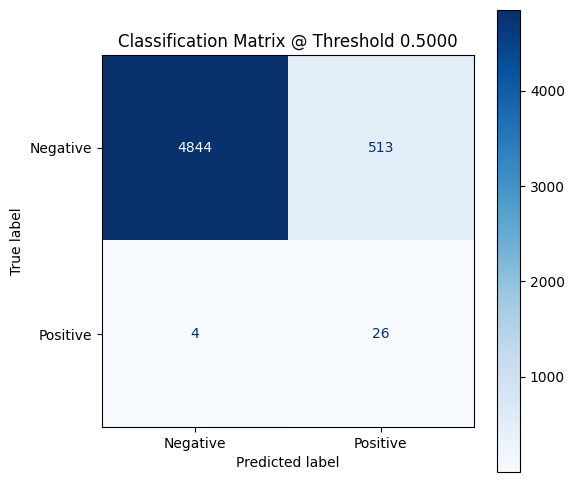

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Convert scores to binary predictions using your threshold
# Assuming 'threshold' was calculated from your Max F1 method
df_complete['predicted_label'] = (df_complete['scaled_score'] >= 0.9).astype(int)

# 2. Generate the matrix
cm = confusion_matrix(df_complete['label'], df_complete['predicted_label'])

# 3. Create the display object
# display_labels maps 0 and 1 to human-readable names if desired
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

# 4. Plot with a color map (standard sklearn style)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d') 

plt.title(f'Classification Matrix @ Threshold {threshold:.4f}')
plt.grid(False) # Clean up grid lines
plt.show()

/tmp/ipykernel_1094417/645497091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_omim['predicted_label'] = (df_omim['scaled_score'] >= 0.5).astype(int)


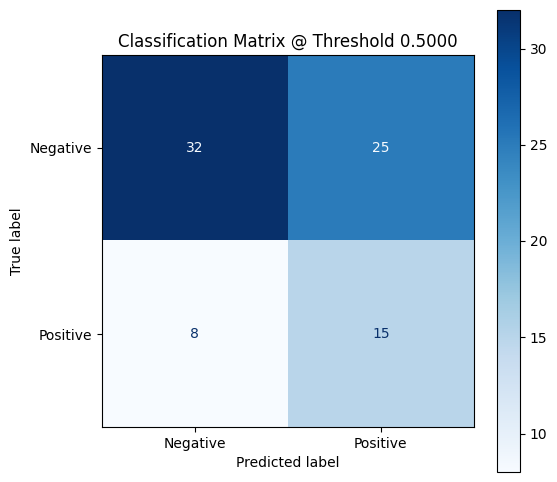

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Convert scores to binary predictions using your threshold
# Assuming 'threshold' was calculated from your Max F1 method
df_omim['predicted_label'] = (df_omim['scaled_score'] >= 0.5).astype(int)

# 2. Generate the matrix
cm = confusion_matrix(df_omim['label'], df_omim['predicted_label'])

# 3. Create the display object
# display_labels maps 0 and 1 to human-readable names if desired
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

# 4. Plot with a color map (standard sklearn style)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d') 

plt.title(f'Classification Matrix @ Threshold {threshold:.4f}')
plt.grid(False) # Clean up grid lines
plt.show()

In [124]:
# Rename 'id1' to 'ID' and 'Symbol' to 'Gene_Symbol'
df_complete = df_complete.rename(columns={'gene': 'id1'})

In [130]:
df_omim = df_omim.rename(columns={'gene': 'id1'})


In [126]:
import os
import pandas as pd

# Load the input file
INPUT_FILE = "complete_data_bibliometrics_with_all_diseases_biobert_svm_prediction_updated.tsv"


df_input = pd.read_csv(INPUT_FILE, sep="\t")
df_input["id1"] = df_input["id1"].astype(str)

# Keep only required columns to avoid accidental overwrites
df_complete["id1"] = df_complete["id1"].astype(str)

df_input = df_input[["id1", "Symbol"]]

# Merge Symbol into df_complete using id1
df_complete = df_complete.merge(
    df_input,
    on="id1",
    how="left"
)



In [189]:
df_omim.columns

Index(['disease', 'gene', 'MultiCens_Score', 'Fusion_RRF', 'VQ_star', 'OpenAI',
       'MedLLaMA', 'OpenAI_NoCRED', 'MedLLaMA_NoCRED', 'Causal_Ratio', 'label',
       'paper_count', 'layer_type', 'scaled_score'],
      dtype='object')

In [137]:
df_omim["id1"] = df_omim["id1"].astype(str)

false_negative_ids = df_omim.loc[
    (df_omim["label"] == 1) &
    (df_omim['scaled_score'] < 0.5),
    "id1"].astype(str)
fn_scores_omim = df_omim[
    df_omim["id1"].astype(str).isin(false_negative_ids)
][["id1", "scaled_score"]].rename(
    columns={"scaled_score": "scaled_score_omim"}
)
fn_scores_complete = df_complete[
    df_complete["id1"].astype(str).isin(false_negative_ids)
][["id1", 'Symbol', "scaled_score"]].rename(
    columns={"scaled_score": "scaled_score_complete"}
)
fn_combined = fn_scores_omim.merge(
    fn_scores_complete,
    on="id1",
    how="left"
)

print(fn_combined.drop_duplicates())


      id1  scaled_score_omim  Symbol  scaled_score_complete
0    6311           0.215190   ATXN2               0.974489
5   51142           0.278481  CHCHD2               0.841232
14   8398           0.189873  PLA2G6               0.978299
17  55737           0.151899   VPS35               0.982335
20   4287           0.202532   ATXN3               0.971092
23   7384           0.126582  UQCRC1               0.918255
25  25793           0.430380   FBXO7               0.965905
27   8867           0.177215   SYNJ1               0.967445


In [146]:
df_omim["id1"] = df_omim["id1"].astype(str)

false_negative_ids = df_omim.loc[
    (df_complete["label"] == 0) &
    (df_complete['scaled_score'] > 0.9),
    "id1"].astype(str)

fn_scores_omim = df_omim[
    df_omim["id1"].astype(str).isin(false_negative_ids)
][["id1", "scaled_score"]].rename(
    columns={"scaled_score": "scaled_score_omim"}
)
fn_scores_complete = df_complete[
    df_complete["id1"].astype(str).isin(false_negative_ids)
][["id1", 'Symbol', "scaled_score"]].rename(
    columns={"scaled_score": "scaled_score_complete"}
)
fn_combined = fn_scores_omim.merge(
    fn_scores_complete,
    on="id1",
    how="left"
)

print(fn_combined.drop_duplicates())


        id1  scaled_score_omim Symbol  scaled_score_complete
0      5319           0.481013   SNCA               0.965207
3     22060           0.455696   SNCA               0.779951
65    50873           0.607595   SNCA               0.899896
68     3093           0.746835   SNCA               0.986169
72    54205           0.911392   SNCA               0.995463
77     7416           0.645570   SNCA               0.981661
79   724066           0.025316   SNCA               0.350352
81      773           0.088608   SNCA               0.953956
83     7384           0.126582   SNCA               0.918255
85     7402           0.468354   SNCA               0.963513
88      348           0.822785   SNCA               0.991649
207   23435           0.075949   SNCA               0.976633
209   25793           0.430380   SNCA               0.965905
211    2624           0.240506   SNCA               0.956031
213    9927           0.253165   SNCA               0.976941
215    6477           0.

In [145]:
df_complete[df_complete['Symbol']=='SNCA'][['id1','scaled_score']]

,id1,scaled_score
0,6469,0.693900
1,6622,0.999262
2,6622,0.999262
3,6622,0.999262
4,6622,0.999262
...,...,...
7549,6117,0.656097
7550,8527,0.215434
7551,230,0.190118
7552,140741,0.196620


In [147]:
df_complete.columns

Index(['disease', 'id1', 'MultiCens_Score', 'Fusion_RRF', 'VQ_star', 'OpenAI',
       'MedLLaMA', 'OpenAI_NoCRED', 'MedLLaMA_NoCRED', 'Causal_Ratio', 'label',
       'paper_count', 'layer_type', 'scaled_score', 'predicted_label',
       'Symbol'],
      dtype='object')

In [223]:
df_omim

,disease,gene,MultiCens_Score,Fusion_RRF,VQ_star,OpenAI,MedLLaMA,OpenAI_NoCRED,MedLLaMA_NoCRED,Causal_Ratio,label,paper_count,layer_type,scaled_score
265,Parkinson_Disease,65018,2.696951e-01,0.666229,0.993373,0.95,0.903693,0.95,1.0,0.568182,1,44,both_layers,0.936709
266,Parkinson_Disease,22223,4.341118e-07,0.079475,0.000000,0.30,0.000000,0.30,1.0,0.000000,0,2,bibliometric_only,0.012658
267,Parkinson_Disease,6622,6.361281e-01,0.686393,0.983167,0.95,0.999999,0.95,1.0,0.360000,1,100,both_layers,0.962025
268,Parkinson_Disease,6531,1.908665e-01,0.395880,0.000000,0.85,0.500000,0.95,1.0,0.000000,1,4,both_layers,0.569620
269,Parkinson_Disease,10981,6.758772e-02,0.480991,0.992367,0.85,0.727870,0.90,1.0,0.500000,1,2,both_layers,0.696203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,Parkinson_Disease,2624,1.874954e-02,0.206992,0.000000,0.85,0.748321,0.85,0.9,0.000000,0,2,both_layers,0.240506
341,Parkinson_Disease,9927,2.054963e-02,0.210546,0.000000,0.85,0.500000,0.90,0.9,0.000000,0,2,both_layers,0.253165
342,Parkinson_Disease,6477,1.773870e-01,0.588138,0.992156,0.85,0.500000,0.90,0.9,0.500000,0,2,both_layers,0.848101
343,Parkinson_Disease,10376,7.780450e-01,0.746598,0.989831,0.85,0.754066,0.85,0.9,0.500000,0,2,both_layers,0.987342


In [224]:
df_omim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 265 to 344
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   disease          80 non-null     object 
 1   gene             80 non-null     object 
 2   MultiCens_Score  80 non-null     float64
 3   Fusion_RRF       80 non-null     float64
 4   VQ_star          80 non-null     float64
 5   OpenAI           80 non-null     float64
 6   MedLLaMA         80 non-null     float64
 7   OpenAI_NoCRED    80 non-null     float64
 8   MedLLaMA_NoCRED  80 non-null     float64
 9   Causal_Ratio     80 non-null     float64
 10  label            80 non-null     int64  
 11  paper_count      80 non-null     int64  
 12  layer_type       80 non-null     object 
 13  scaled_score     80 non-null     float64
dtypes: float64(9), int64(2), object(3)
memory usage: 9.4+ KB


In [10]:
cols_to_keep = ['gene', 'disease', 'scaled_score']
df_omim_map = (
    df_omim[cols_to_keep]
    .rename(columns={
        'scaled_score': 'scaled_score_omim',
    })
)

df_complete_map = (
    df_complete[cols_to_keep]
    .rename(columns={
        'scaled_score': 'scaled_score_complete',
       
    })
)
df_omim_map['gene']=df_omim_map['gene'].apply(lambda x:x.split(';')[0])
df_omim_map['gene']=df_omim_map['gene'].astype('int64')
# df_complete_map['gene']=df_complete_map['gene'].apply(lambda x:x.split(';')[0])
# df_complete_map['gene']=df_complete_map['gene'].astype('int64')

In [228]:
df_omim_map.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 265 to 344
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gene               80 non-null     object 
 1   disease            80 non-null     object 
 2   scaled_score_omim  80 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [12]:
# df_complete=pd.read_csv('PD_complete_data_with_omim.tsv',sep='\t')

df_merged=df_complete_map.merge(
    df_omim_map,
    how='left',
    on=['gene', 'disease']
)


In [22]:
df_final=df3.merge(df_merged,how='left',
    left_on=['gene_id', 'disease'],right_on=['gene', 'disease'])

In [23]:
df_final.isna().sum()


Unnamed: 0                   0
index                        0
id1                          0
id2                          0
sentence                     0
Prediction                   0
PMID                         0
gene_id                      0
gene_symbol                  0
journal                      0
hindex                       0
year                         0
citations                    0
sentence_processed           0
pred_label                   0
pred_proba                   0
label                        0
OMIM                         0
disease                      0
Symbol                       0
year_diff_norm               0
citations_scaled             0
hindex_scaled                0
rs                           0
vq*                          0
vq_star_mean                 0
gene                         0
scaled_score_complete        0
scaled_score_omim        66428
dtype: int64

In [279]:
df_final.to_csv('pd_final_merged.csv')

In [164]:
df2.drop(columns='Unnamed: 0', inplace=True)

df2.columns


Index(['index', 'id1', 'id2', 'is_in_same_sent', 'min_sents_window',
       'sentence', 'in_neighbors', 'label', 'hindex', 'year', 'citations',
       'journal', 'disease', 'Symbol', 'Prediction', 'year_diff', 'pred_label',
       'pred_proba', 'scaled_score_omim', 'predicted_label_omim',
       'scaled_score_complete', 'predicted_label_complete', 'rs', 'vq_star'],
      dtype='object')

In [162]:
df2 = df2.merge(
    df3[['PMID', 'id1', 'disease', 'rs', 'vq*']]
        .rename(columns={
            'PMID': 'index',
            'disease': 'id2',
            'vq*': 'vq_star'
        }),
    how='left',
    on=['index', 'id1', 'id2']
)


In [30]:
df_final.columns

Index(['Unnamed: 0', 'index', 'id1', 'id2', 'sentence', 'Prediction', 'PMID',
       'gene_id', 'gene_symbol', 'journal', 'hindex', 'year', 'citations',
       'sentence_processed', 'pred_label', 'pred_proba', 'label', 'OMIM',
       'disease', 'Symbol', 'year_diff_norm', 'citations_scaled',
       'hindex_scaled', 'rs', 'vq*', 'vq_star_mean', 'gene',
       'scaled_score_complete', 'scaled_score_omim'],
      dtype='object')

In [29]:
df_final['id1'].nunique()

5387

In [32]:
cols = [
    'index', 'id1', 'id2', 'sentence',
    'pred_label', 'OMIM', 'rs', 'vq*',
    'scaled_score_complete', 'scaled_score_omim'
]

df_filtered = df_final.loc[
    (df_final['scaled_score_complete'] > 0.97) &
    (df_final['OMIM'] == 0),
    cols
]
df_filtered

,index,id1,id2,sentence,pred_label,OMIM,rs,vq*,scaled_score_complete,scaled_score_omim
12,36995304,351,D010300,Neuroprotective Effects of Lactoferrin in @Dis...,0,0,0.055742,0.945083,0.998759,0.860759
13,36995304,1385,D010300,Neuroprotective Effects of Lactoferrin in @Dis...,0,0,0.055742,0.830647,0.991857,NaN
19,36995304,207,D010300,Neuroprotective Effects of Lactoferrin in @Dis...,0,0,0.055742,0.859833,0.996967,0.556962
27,17329252,25820,D010300,Relative sensitivity of parkin and other cyste...,0,0,0.129410,0.000000,0.980839,NaN
36,21907011,1977,D010300,Translation initiator EIF4G1 mutations in fami...,0,0,0.228732,0.000000,0.980189,NaN
...,...,...,...,...,...,...,...,...,...,...
99649,12925569,23208,D010300,The autosomal recessive juvenile Parkinson dis...,0,0,0.268076,0.934650,0.970031,NaN
99671,24360742,4790,D010300,Leucine-rich repeat kinase 2 modulates cycloox...,1,0,0.163278,0.895858,0.997974,0.898734
99679,32355309,7157,D010300,Genome-wide association study identifies zonis...,0,0,0.168368,0.873798,0.999835,1.000000
99747,28653979,9627,D010300,"Hypermethylation of @GeneSrc$ , Alpha-Synuclei...",0,0,0.157938,0.977003,0.992705,0.886076
